# 설치/로드

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [ ]:
# 폰트 설치
!apt-get -qq install fonts-nanum

# 나눔고딕 폰트 경로와 객체 생성
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 경고 메시지 끄기
import warnings
warnings.filterwarnings('ignore')

# matplotlib 폰트 관련 경고 제거
import logging
logging.getLogger('matplotlib.font_manager').disabled = True


Selecting previously unselected package fonts-nanum.
(Reading database ... 126109 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
df = pd.read_csv("환경위생_통합점수_최종처리_개선(찐최종).csv")
df_high = pd.read_csv("환경위생_통합점수_최종처리_개선(상반기).csv")
df_low = pd.read_csv("환경위생_통합점수_최종처리_개선(하반기).csv")

# 데이터 확인

In [ ]:
# 각 컬럼 집합 생성
cols_df = set(df.columns)
cols_high = set(df_high.columns)
cols_low = set(df_low.columns)

# 공통 컬럼
common_cols = cols_df & cols_high & cols_low
print("공통 컬럼 (3개 모두에 있음):")
print(sorted(common_cols))

# df에만 있고 나머지엔 없는 컬럼
only_df = cols_df - (cols_high | cols_low)
print("\n df에만 있는 컬럼:")
print(sorted(only_df))

# df_high에만 있는 컬럼
only_high = cols_high - (cols_df | cols_low)
print("\ndf_high에만 있는 컬럼:")
print(sorted(only_high))

# df_low에만 있는 컬럼
only_low = cols_low - (cols_df | cols_high)
print("\n df_low에만 있는 컬럼:")
print(sorted(only_low))


공통 컬럼 (3개 모두에 있음):
['ADRCD_NM', 'AIR_BACT_MAX', 'AIR_BACT_SCORE', 'AIR_BACT_WEIGHTED', 'ASBESTOS_MAX', 'ASBESTOS_SCORE', 'ASBESTOS_WEIGHTED', 'BENZENE_MAX', 'BENZENE_SCORE', 'BENZENE_WEIGHTED', 'BLKB_ITENI_MAX', 'BLKB_ITENI_SCORE', 'BLKB_ITENI_WEIGHTED', 'CO_MAX', 'CO_SCORE', 'CO_WEIGHTED', 'DES_ITENI_MAX', 'DES_ITENI_SCORE', 'DES_ITENI_WEIGHTED', 'ETHY_BENZENE_MAX', 'ETHY_BENZENE_SCORE', 'ETHY_BENZENE_WEIGHTED', 'FALL_BACT_MAX', 'FALL_BACT_SCORE', 'FALL_BACT_WEIGHTED', 'GMNSM_MNUT_DST_MAX', 'GMNSM_MNUT_DST_SCORE', 'GMNSM_MNUT_DST_WEIGHTED', 'HCHO_MAX', 'HCHO_SCORE', 'HCHO_WEIGHTED', 'ITENI_MAX', 'ITENI_SCORE', 'ITENI_WEIGHTED', 'MITE_MAX', 'MITE_SCORE', 'MITE_WEIGHTED', 'MNUT_DST_MAX', 'MNUT_DST_SCORE', 'MNUT_DST_WEIGHTED', 'NO2_MAX', 'NO2_SCORE', 'NO2_WEIGHTED', 'NSE_MAX', 'NSE_SCORE', 'NSE_WEIGHTED', 'O3_MAX', 'O3_SCORE', 'O3_WEIGHTED', 'RN_MAX', 'RN_SCORE', 'RN_WEIGHTED', 'SAFETY_GRADE', 'SCHUL_CODE', 'SCHUL_NM', 'STYLENE_MAX', 'STYLENE_SCORE', 'STYLENE_WEIGHTED', 'TOLUENE_MAX', 'T

In [ ]:
# 컬럼 목록 및 데이터 타입 확인
print(df.columns)
print(df.dtypes)

# 결측치 확인
print(df.isnull().sum())

Index(['SCHUL_CODE', 'SCHUL_NM', 'ADRCD_NM', '공시년도', 'BLKB_ITENI_MAX',
       'DES_ITENI_MAX', 'ITENI_MAX', 'NSE_MAX', 'MNUT_DST_MAX',
       'GMNSM_MNUT_DST_MAX', 'ULTRA_DST_MAX', 'HCHO_MAX', 'AIR_BACT_MAX',
       'RN_MAX', 'O3_MAX', 'VOCS_MAX', 'BENZENE_MAX', 'TOLUENE_MAX',
       'ETHY_BENZENE_MAX', 'XYLENE_MAX', 'STYLENE_MAX', 'ASBESTOS_MAX',
       'CO_MAX', 'NO2_MAX', 'FALL_BACT_MAX', 'MITE_MAX', 'BLKB_ITENI_SCORE',
       'DES_ITENI_SCORE', 'ITENI_SCORE', 'NSE_SCORE', 'MNUT_DST_SCORE',
       'GMNSM_MNUT_DST_SCORE', 'ULTRA_DST_SCORE', 'HCHO_SCORE',
       'AIR_BACT_SCORE', 'RN_SCORE', 'O3_SCORE', 'VOCS_SCORE', 'BENZENE_SCORE',
       'TOLUENE_SCORE', 'ETHY_BENZENE_SCORE', 'XYLENE_SCORE', 'STYLENE_SCORE',
       'ASBESTOS_SCORE', 'CO_SCORE', 'NO2_SCORE', 'FALL_BACT_SCORE',
       'MITE_SCORE', 'BLKB_ITENI_WEIGHTED', 'DES_ITENI_WEIGHTED',
       'ITENI_WEIGHTED', 'NSE_WEIGHTED', 'MNUT_DST_WEIGHTED',
       'GMNSM_MNUT_DST_WEIGHTED', 'ULTRA_DST_WEIGHTED', 'HCHO_WEIGHTED',
       '

In [ ]:
# 등급별 점수 범위 확인
score_by_grade = df.groupby("SAFETY_GRADE")["TOTAL_WEIGHTED_SCORE"].agg(["min", "max", "mean"]).reset_index()
score_by_grade = score_by_grade.sort_values(by="SAFETY_GRADE")

score_by_grade

,SAFETY_GRADE,min,max,mean
0,A,0.146557,0.399949,0.352433
1,B,0.400020,0.499870,0.443470
2,C,0.500012,0.549831,0.521222
3,D,0.550432,0.748223,0.594989
4,E,0.750683,7.976406,1.207708


In [ ]:
# 안전등급별 개수 확인

print(df['SAFETY_GRADE'].value_counts())

print(df_high['SAFETY_GRADE'].value_counts())

print(df_low['SAFETY_GRADE'].value_counts())

SAFETY_GRADE
B    1662
A    1610
C     327
D     192
E      41
Name: count, dtype: int64
SAFETY_GRADE
B    885
A    658
C    211
D    137
E     24
Name: count, dtype: int64
SAFETY_GRADE
A    952
B    776
C    116
D     55
E     17
Name: count, dtype: int64


In [ ]:
# 2. 기준 연도 설정
CURRENT_YEAR = 2025

# 3. 건물 연식 계산
df["건물연식"] = CURRENT_YEAR - df["공시년도"]

# 4. 전체 학교 수
total_schools = len(df)

# 5. 30년 이상 학교
over_30_count = (df["건물연식"] >= 30).sum()
over_30_ratio = over_30_count / total_schools * 100

# 6. 40년 이상 학교
over_40_count = (df["건물연식"] >= 40).sum()
over_40_ratio = over_40_count / total_schools * 100

# 7. 출력
print(f"전체 학교 수: {total_schools}개")
print(f"30년 이상 된 학교 수: {over_30_count}개 ({over_30_ratio:.2f}%)")
print(f"40년 이상 된 학교 수: {over_40_count}개 ({over_40_ratio:.2f}%)")

전체 학교 수: 3832개
30년 이상 된 학교 수: 3121개 (81.45%)
40년 이상 된 학교 수: 2289개 (59.73%)


# 설립년도

In [ ]:
### 두번째 표: 각 행의 합이 100이 됨. 세번째 표: 전체 행의 합이 100임.

# 설립년도 구간 설정 (예: 1890년부터 10년 단위로)
bins = list(range(1890, 2030, 10))  # 2030은 포함되지 않지만 upper bound 역할
labels = [f"{b}~{b+9}" for b in bins[:-1]]

# 설립년도 기준 구간 열 생성
df['설립년도_구간'] = pd.cut(df['공시년도'], bins=bins, labels=labels, right=True)

# 구간별 안전등급 분포 집계
grade_distribution = pd.crosstab(df['설립년도_구간'], df['SAFETY_GRADE'])

# 결과 출력
from IPython.display import display
display(grade_distribution)

# 각 행을 100% 기준으로 비율화
grade_distribution_ratio = grade_distribution.div(grade_distribution.sum(axis=1), axis=0) * 100

# 소수점 1자리까지 반올림
grade_distribution_ratio = grade_distribution_ratio.round(1)

# 결과 출력
display(grade_distribution_ratio)

# 전체 합을 기준으로 각 셀을 백분율로 변환
grade_distribution_total_ratio = grade_distribution / grade_distribution.values.sum() * 100

# 소수점 2자리까지 반올림
grade_distribution_total_ratio = grade_distribution_total_ratio.round(2)

# 결과 확인
display(grade_distribution_total_ratio)


SAFETY_GRADE,A,B,C,D,E
설립년도_구간,,,,,
1890~1899,9,29,5,9,0
1900~1909,7,12,6,6,0
1910~1919,12,17,3,0,0
1920~1929,31,17,2,2,0
1930~1939,37,29,0,2,0
1940~1949,89,96,19,11,1
1950~1959,37,56,18,9,4
1960~1969,152,143,27,18,4
1970~1979,205,261,50,21,4


SAFETY_GRADE,A,B,C,D,E
설립년도_구간,,,,,
1890~1899,17.3,55.8,9.6,17.3,0.0
1900~1909,22.6,38.7,19.4,19.4,0.0
1910~1919,37.5,53.1,9.4,0.0,0.0
1920~1929,59.6,32.7,3.8,3.8,0.0
1930~1939,54.4,42.6,0.0,2.9,0.0
1940~1949,41.2,44.4,8.8,5.1,0.5
1950~1959,29.8,45.2,14.5,7.3,3.2
1960~1969,44.2,41.6,7.8,5.2,1.2
1970~1979,37.9,48.2,9.2,3.9,0.7


SAFETY_GRADE,A,B,C,D,E
설립년도_구간,,,,,
1890~1899,0.24,0.76,0.13,0.24,0.00
1900~1909,0.18,0.31,0.16,0.16,0.00
1910~1919,0.31,0.45,0.08,0.00,0.00
1920~1929,0.81,0.45,0.05,0.05,0.00
1930~1939,0.97,0.76,0.00,0.05,0.00
1940~1949,2.33,2.52,0.50,0.29,0.03
1950~1959,0.97,1.47,0.47,0.24,0.10
1960~1969,3.99,3.75,0.71,0.47,0.10
1970~1979,5.38,6.85,1.31,0.55,0.10


1. 1980~1989년 설립 학교의 비중이 가장 크다
A등급: 13.85%, B등급: 14.98% → 전체 학교의 약 **28.8%**가 이 시기에 설립

이 구간이 학교 설립의 중심기였다는 것을 시사하며, 관리 대상이 많고 정책적 우선순위로 고려될 수 있음

2. 1970~1989년 사이 학교가 전체의 40% 이상
1970~1979: 총합 14.19%

1980~1989: 총합 34.55%

→ 이 두 시기 합산 약 48.7%
📌 노후화 리스크가 집중된 시기로, 환경개선이나 리모델링 우선 대상이 될 수 있음

3. 2000년 이후 신설 학교 비율은 낮다
2000~2009: 총합 11.02%

2010~2019: 총합 4.60%

→ 신규 설립이 줄었거나 학령인구 감소 반영 가능성

이 학교들은 대부분 A, B등급으로 유지되고 있음 → 상대적으로 안전함

4. 구 1950년대 이전 학교는 소수지만 고위험 가능성 내포
특히 1940년대 이전 학교도 여전히 존재

상대적으로 C~D등급 비율이 눈에 띄진 않지만, 수가 적기 때문에 소수의 위험 학교가 평균을 왜곡하지 않음

정책적으로는 “역사성 + 리모델링” 필요성 판단 가능



# 상/하반기 비교 **(여기서부터 확인)**

학교별로 상반기와 하반기 환경위생_총가중점수(TOTAL_WEIGHTED_SCORE)의 차이를 계산한 결과
(점수가 낮을수록 등급이 높아짐)

In [ ]:
# 상/하반기별로 1개씩만 있는 경우에만 merge (추천)
df_high_score = df_high[['SCHUL_CODE', 'SCHUL_NM', 'TOTAL_WEIGHTED_SCORE']]
df_low_score = df_low[['SCHUL_CODE', 'TOTAL_WEIGHTED_SCORE']]

# 중복 제거
df_high_score = df_high_score.drop_duplicates(subset='SCHUL_CODE')
df_low_score = df_low_score.drop_duplicates(subset='SCHUL_CODE')

# 병합
df_compare = pd.merge(df_high_score, df_low_score, on='SCHUL_CODE', how='inner', suffixes=('_상반기', '_하반기'))
df_compare['점수변화'] = df_compare['TOTAL_WEIGHTED_SCORE_하반기'] - df_compare['TOTAL_WEIGHTED_SCORE_상반기']

# 결과 보기 좋게
df_compare = df_compare.rename(columns={
    'TOTAL_WEIGHTED_SCORE_상반기': '상반기_SCORE',
    'TOTAL_WEIGHTED_SCORE_하반기': '하반기_SCORE'
})

# 점수변화 절댓값 기준 정렬
df_compare_sorted = df_compare.copy()
df_compare_sorted['변화절댓값'] = df_compare_sorted['점수변화'].abs()

# 내림차순 정렬
df_compare_sorted = df_compare_sorted.sort_values(by='변화절댓값', ascending=False)

# 상위 10개 확인
print(df_compare_sorted[['SCHUL_NM', '상반기_SCORE', '하반기_SCORE', '점수변화']].head(20))


      SCHUL_NM  상반기_SCORE  하반기_SCORE      점수변화
67    서울문정초등학교   0.407319   1.436147  1.028828
272   서울신길초등학교   0.505181   1.216270  0.711090
251   서울휘경초등학교   1.073049   0.488177 -0.584872
14    서울방배초등학교   1.000854   0.482322 -0.518532
561      구룡중학교   0.387977   0.902783  0.514806
600      송파중학교   0.804076   0.349218 -0.454858
596      방이중학교   0.807570   0.406575 -0.400995
69    서울방이초등학교   0.781070   0.387768 -0.393301
571      서운중학교   0.260794   0.651754  0.390960
169   서울당서초등학교   0.730756   0.360570 -0.370186
459   서울정수초등학교   0.440676   0.788998  0.348322
486   서울청운초등학교   0.658327   0.310866 -0.347462
402   서울구남초등학교   0.594411   0.258113 -0.336298
701      문창중학교   0.739103   0.418934 -0.320168
790      장위중학교   0.478950   0.797543  0.318593
845     관악고등학교   0.451371   0.756337  0.304966
685      전일중학교   0.583951   0.282098 -0.301852
508  서울보라매초등학교   0.442566   0.146557 -0.296009
213   서울정심초등학교   0.548936   0.256032 -0.292904
955  서울양원숲초등학교   0.682660   0.400859 -0.281800


### 등급별 분포

In [ ]:
# 등급별 점수 범위 확인
score_by_grade = df.groupby("SAFETY_GRADE")["TOTAL_WEIGHTED_SCORE"].agg(["min", "max", "mean"]).reset_index()
score_by_grade = score_by_grade.sort_values(by="SAFETY_GRADE")

score_by_grade

,SAFETY_GRADE,min,max,mean
0,A,0.146557,0.399949,0.352433
1,B,0.400020,0.499870,0.443470
2,C,0.500012,0.549831,0.521222
3,D,0.550432,0.748223,0.594989
4,E,0.750683,7.976406,1.207708


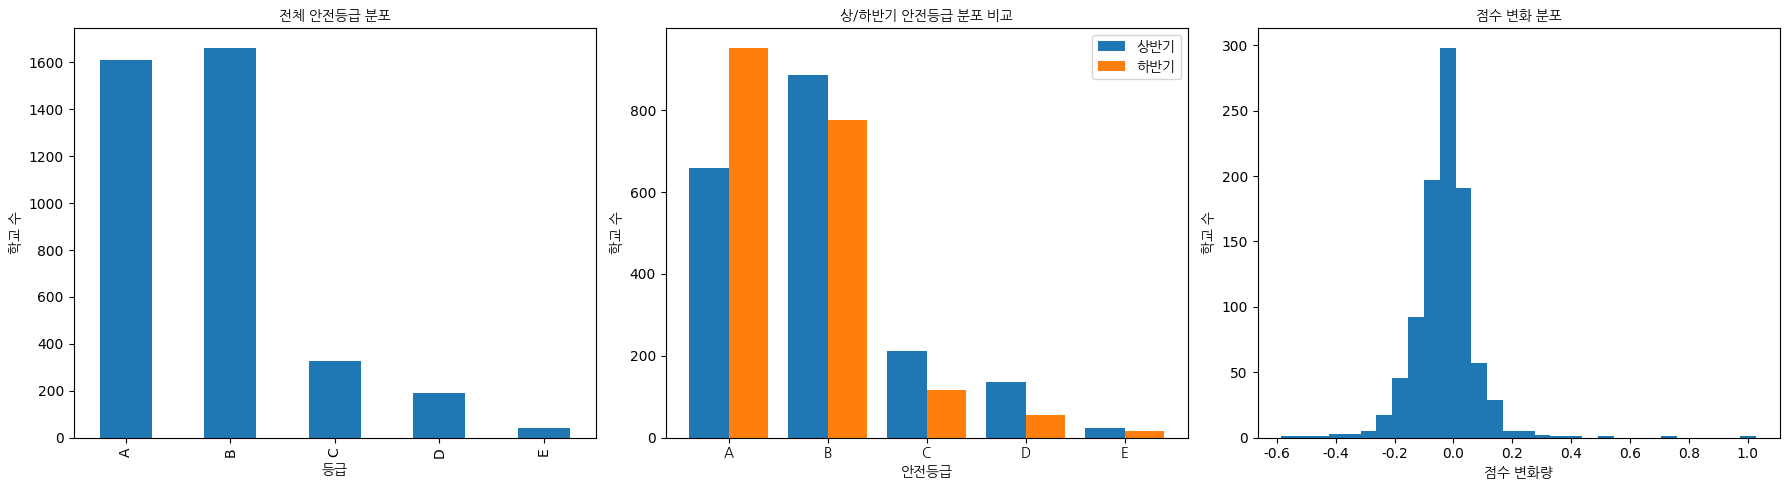

In [ ]:
# 등급 순서 정의
grade_order = ['A', 'B', 'C', 'D', 'E']
df['SAFETY_GRADE'] = pd.Categorical(df['SAFETY_GRADE'], categories=grade_order, ordered=True)
df_high['SAFETY_GRADE'] = pd.Categorical(df_high['SAFETY_GRADE'], categories=grade_order, ordered=True)
df_low['SAFETY_GRADE'] = pd.Categorical(df_low['SAFETY_GRADE'], categories=grade_order, ordered=True)

# 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. 전체 안전등급 분포
df['SAFETY_GRADE'].value_counts().sort_index().plot(kind='bar', ax=axes[0])
axes[0].set_title("전체 안전등급 분포", fontproperties=font_prop)
axes[0].set_xlabel("등급", fontproperties=font_prop)
axes[0].set_ylabel("학교 수", fontproperties=font_prop)

# 2. 상/하반기 안전등급 분포 비교
grade_counts_high = df_high['SAFETY_GRADE'].value_counts().sort_index()
grade_counts_low = df_low['SAFETY_GRADE'].value_counts().sort_index()

bar_width = 0.4
x = range(len(grade_order))

axes[1].bar([i - bar_width/2 for i in x], grade_counts_high, width=bar_width, label='상반기')
axes[1].bar([i + bar_width/2 for i in x], grade_counts_low, width=bar_width, label='하반기')
axes[1].set_xticks(x)
axes[1].set_xticklabels(grade_order, fontproperties=font_prop)
axes[1].set_title("상/하반기 안전등급 분포 비교", fontproperties=font_prop)
axes[1].set_xlabel("안전등급", fontproperties=font_prop)
axes[1].set_ylabel("학교 수", fontproperties=font_prop)
axes[1].legend(prop=font_prop)

# 3. 점수 변화 분포
df_compare['점수변화'].plot.hist(bins=30, ax=axes[2])
axes[2].set_title("점수 변화 분포", fontproperties=font_prop)
axes[2].set_xlabel("점수 변화량", fontproperties=font_prop)
axes[2].set_ylabel("학교 수", fontproperties=font_prop)

# 전체 레이아웃 정리
plt.tight_layout()
plt.show()


하반기에 갑자기 학교들이 좋아지는데? ☹

상반기→하반기 항목별 변화량 통계 요약:

                     count      mean       std       min       25%       50%  \
CO_SCORE_변화량        3822.0  0.002137  0.117137 -0.970000 -0.020000  0.000000   
MNUT_DST_SCORE_변화량  3822.0 -0.078249  0.279034 -1.038667 -0.261333 -0.057333   
VOCS_SCORE_변화량      3822.0 -0.043507  0.357249 -5.956281 -0.127096  0.000000   
HCHO_SCORE_변화량      3822.0 -0.008870  0.207091 -4.691000 -0.081496  0.000000   

                         75%       max  
CO_SCORE_변화량        0.020000  0.980000  
MNUT_DST_SCORE_변화량  0.076000  0.861333  
VOCS_SCORE_변화량      0.001755  3.350000  
HCHO_SCORE_변화량      0.067000  1.116504  


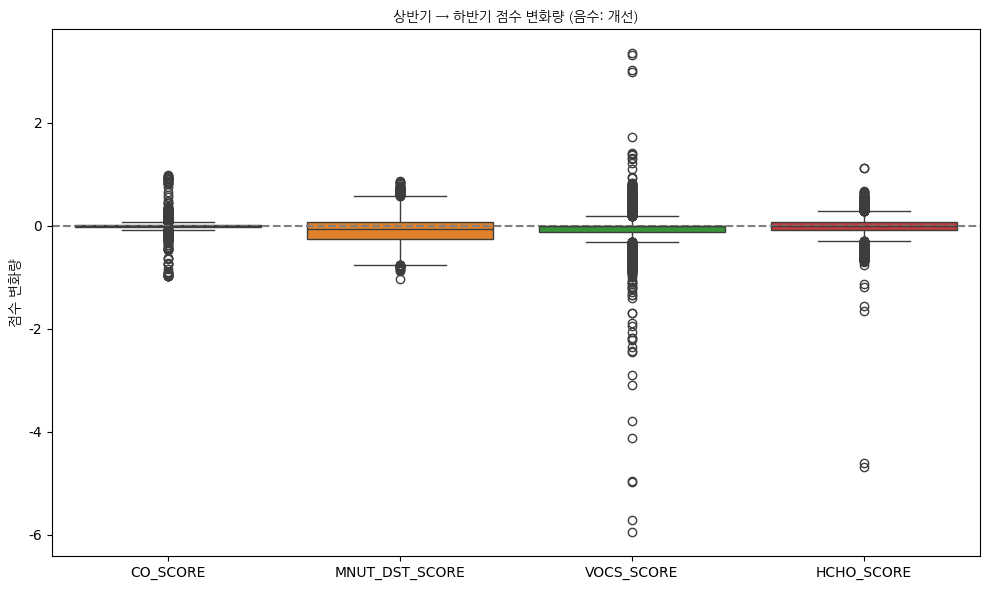

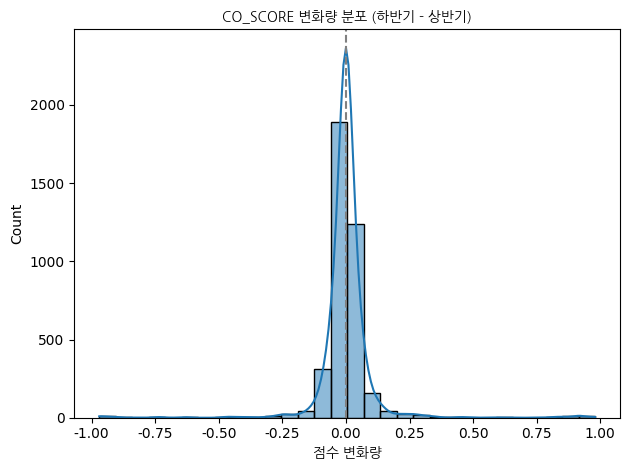

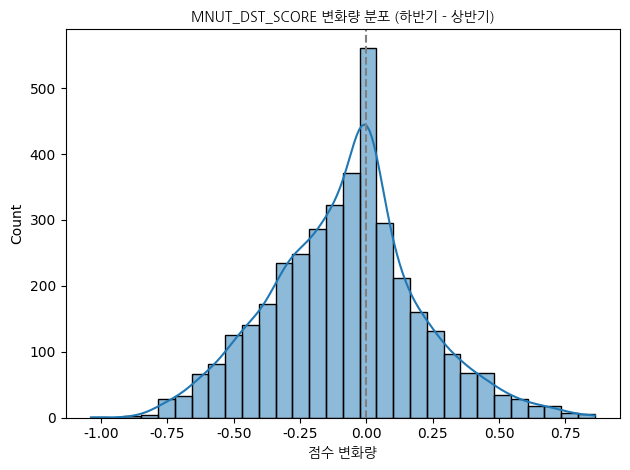

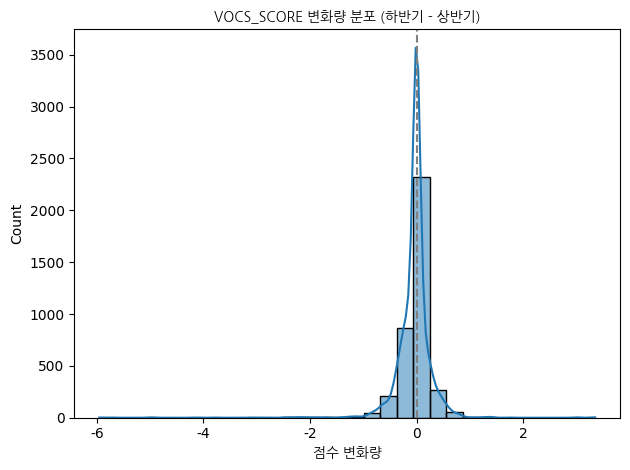

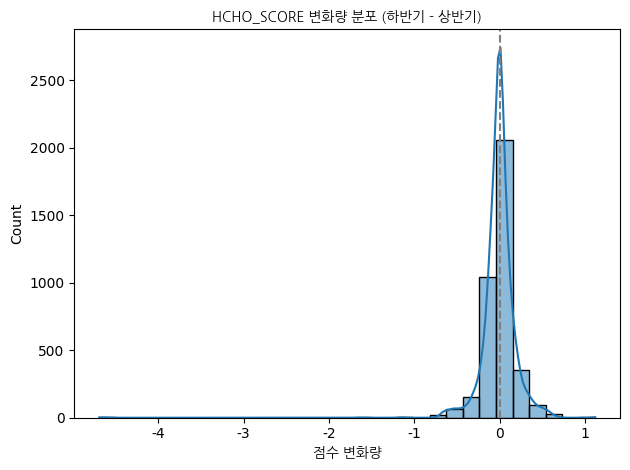

In [ ]:
# 1. 분석 대상 항목 선정
materials = ['CO_SCORE', 'MNUT_DST_SCORE', 'VOCS_SCORE', 'HCHO_SCORE']

# 2. 학교 코드 기준으로 병합 (접미사로 상/하 구분)
merged = pd.merge(
    df_high,
    df_low,
    on='SCHUL_CODE',
    suffixes=('_상', '_하')
)

# 3. 점수 변화량 계산
for mat in materials:
    col_high = f'{mat}_상'
    col_low = f'{mat}_하'
    diff_col = f'{mat}_변화량'
    if col_high in merged.columns and col_low in merged.columns:
        merged[diff_col] = merged[col_low] - merged[col_high]
    else:
        print(f' 누락된 항목: {mat}')

# 4. 변화량 통계 요약
diff_cols = [f'{mat}_변화량' for mat in materials if f'{mat}_변화량' in merged.columns]
summary = merged[diff_cols].describe().T
summary.columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
print("상반기→하반기 항목별 변화량 통계 요약:\n")
print(summary)

# 5. 박스플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged[diff_cols])
plt.axhline(0, color='gray', linestyle='--')
plt.title("상반기 → 하반기 점수 변화량 (음수: 개선)", fontproperties = font_prop)
plt.ylabel("점수 변화량", fontproperties = font_prop)
plt.xticks(ticks=range(len(materials)), labels=materials)
plt.tight_layout()
plt.show()

# 6. 히스토그램: 항목별 분포 확인
for mat in materials:
    diff_col = f'{mat}_변화량'
    if diff_col in merged.columns:
        plt.figure()
        sns.histplot(merged[diff_col], bins=30, kde=True)
        plt.axvline(0, color='gray', linestyle='--')
        plt.title(f"{mat} 변화량 분포 (하반기 - 상반기)", fontproperties = font_prop)
        plt.xlabel("점수 변화량", fontproperties = font_prop)
        plt.tight_layout()
        plt.show()


📊 항목별 상세 해석
1. MNUT_DST_SCORE (PM2.5로 추정)
평균 -0.078, 중앙값도 음수

75% 이하의 학교가 개선됨

→ 봄철 황사와 미세먼지 농도가 높은데, 가을로 접어들며 자연 개선된 것으로 해석 가능

2. VOCS_SCORE (TVOC 계열)
평균 -0.044, 중앙값도 0이지만 25%는 꽤 많이 낮아짐

→ 여름철 VOC 방출 증가 → 하반기 자연 환기 + 온도 안정화로 개선

3. HCHO_SCORE
소폭 감소, 극단적인 이상치(최소 -4.69)도 존재

→ 일부 학교는 매우 많이 개선됨, 대다수는 미세 개선

4. CO_SCORE
변화량 평균 0.002, 중앙값도 0 → 변화 거의 없음

→ CO는 환기보다도 기기 사용이나 실내 구조에 더 영향 받는 항목일 수 있음

# 등급 분포 및 지역별 편차 분석
-> 환경위생 불균형 파악 (지역 맞춤형 예산 배정 필요)

### A, B 등급 받은 학교 지역 분포 / 등급 상승

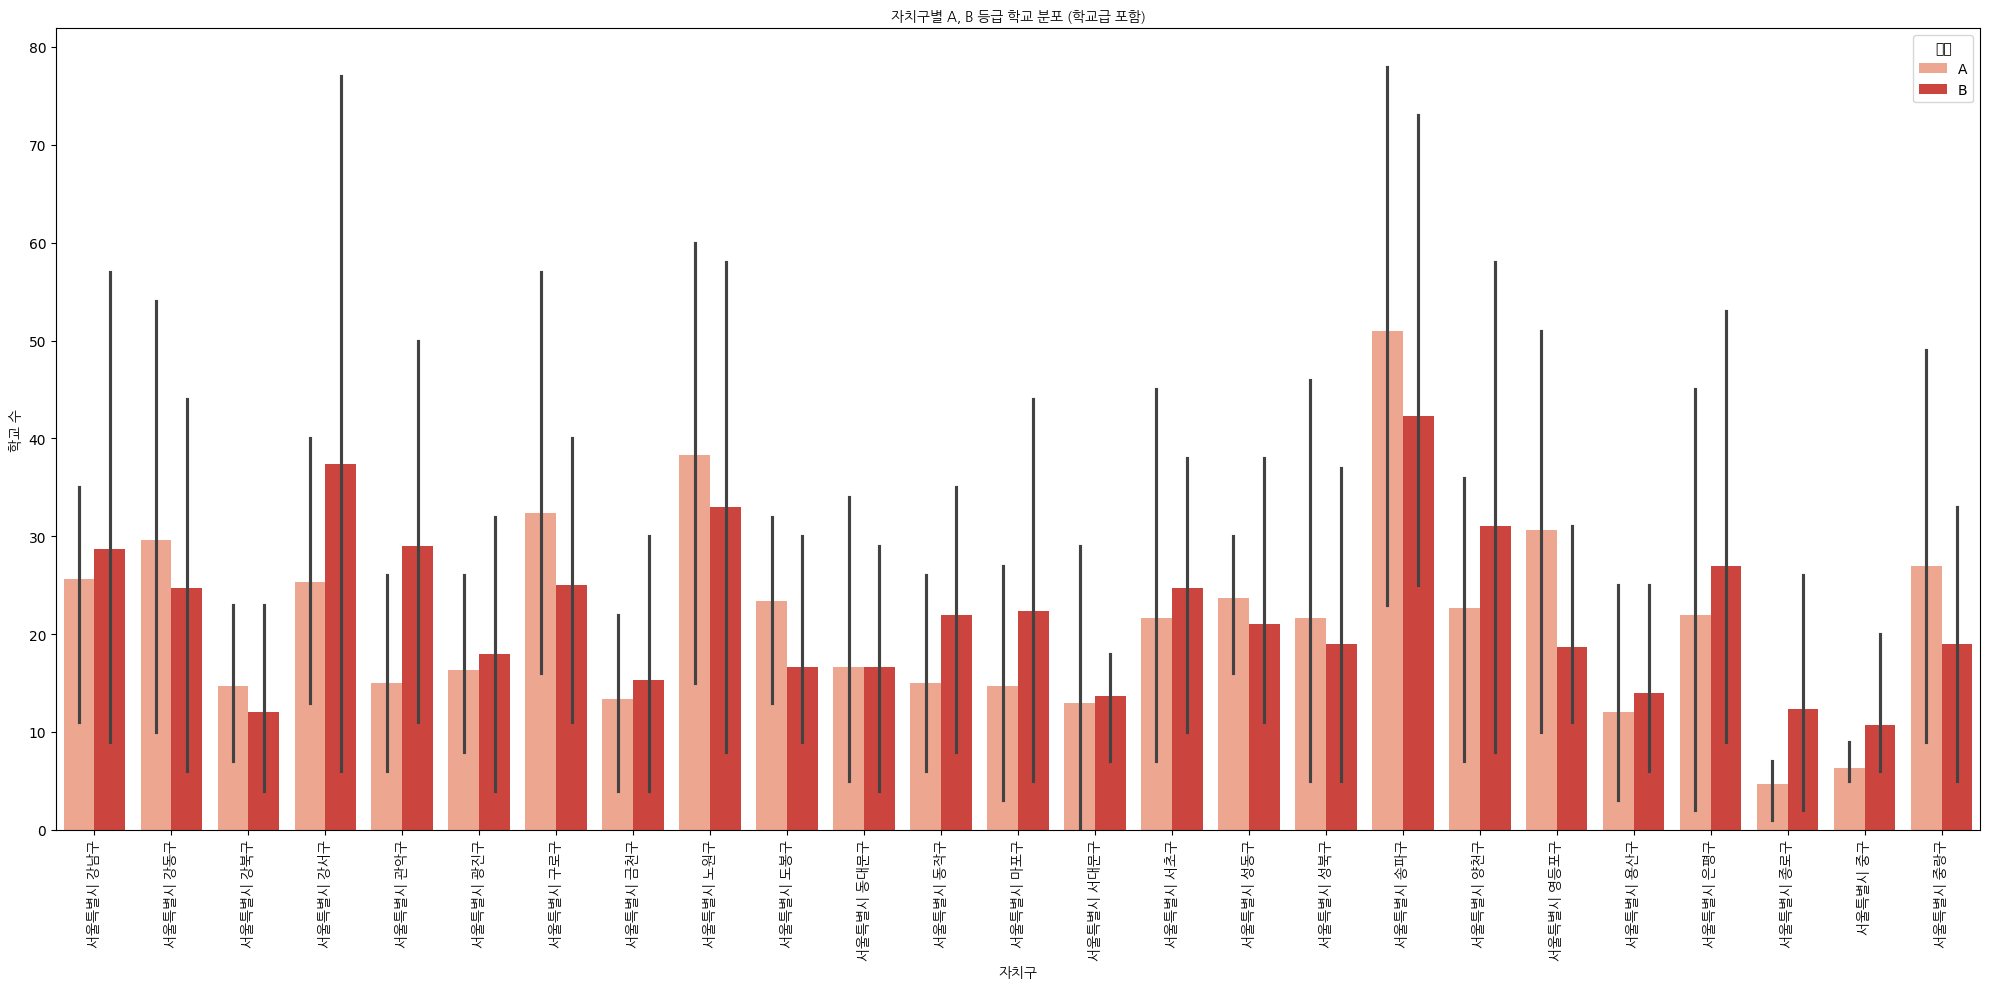

In [ ]:
# 학교급 추정
df['학교급'] = df['SCHUL_NM'].apply(
    lambda x: '초등학교' if '초' in str(x) else ('중학교' if '중' in str(x) else ('고등학교' if '고' in str(x) else '기타'))
)

# A, B 등급 필터링
target_grades = ['A', 'B']
df_filtered = df[df["SAFETY_GRADE"].isin(target_grades)]

# 지역별 등급별 학교 수 카운트 (학교급 포함)
grade_counts = df_filtered.groupby(["ADRCD_NM", "학교급", "SAFETY_GRADE"]).size().reset_index(name="학교 수")

# 시각화: 자치구별 학교급별 등급 분포
plt.figure(figsize=(20, 10))
sns.barplot(
    data=grade_counts,
    x="ADRCD_NM", y="학교 수",
    hue="SAFETY_GRADE",
    hue_order=["A", "B"],
    palette="Reds"
)
plt.xticks(rotation=90)
plt.title("자치구별 A, B 등급 학교 분포 (학교급 포함)", fontproperties = font_prop)
plt.xlabel("자치구", fontproperties = font_prop)
plt.xticks(fontproperties = font_prop)
plt.ylabel("학교 수", fontproperties = font_prop)
plt.legend(title="등급")
plt.tight_layout()
plt.show()


In [ ]:
# 1. A, B 등급만 필터링
target_grades = ['A', 'B']
df_high_filtered = df_high[df_high["SAFETY_GRADE"].isin(target_grades)].copy()
df_low_filtered = df_low[df_low["SAFETY_GRADE"].isin(target_grades)].copy()

# 2. 학교급 재추정
df_high_filtered['학교급'] = df_high_filtered['SCHUL_NM'].apply(
    lambda x: '초등학교' if '초' in str(x) else ('중학교' if '중' in str(x) else ('고등학교' if '고' in str(x) else '기타'))
)
df_low_filtered['학교급'] = df_low_filtered['SCHUL_NM'].apply(
    lambda x: '초등학교' if '초' in str(x) else ('중학교' if '중' in str(x) else ('고등학교' if '고' in str(x) else '기타'))
)

# 3. 그룹화
high_grouped = df_high_filtered.groupby(["ADRCD_NM", "SAFETY_GRADE"]).size().reset_index(name="상반기 학교 수")
low_grouped = df_low_filtered.groupby(["ADRCD_NM", "SAFETY_GRADE"]).size().reset_index(name="하반기 학교 수")

# 4. 병합
merged = pd.merge(
    high_grouped,
    low_grouped,
    how="outer",
    on=["ADRCD_NM", "SAFETY_GRADE"]
)

# 5. 정렬
merged = merged.sort_values(by=["ADRCD_NM", "SAFETY_GRADE"])
merged = merged[merged["SAFETY_GRADE"].isin(["A", "B"])]

print("A, B 등급 학교 수 상/하반기 비교 (학교급 포함)")
display(merged)


A, B 등급 학교 수 상/하반기 비교 (학교급 포함)


,ADRCD_NM,SAFETY_GRADE,상반기 학교 수,하반기 학교 수
0,서울특별시 강남구,A,32,45
1,서울특별시 강남구,B,44,41
5,서울특별시 강동구,A,41,48
6,서울특별시 강동구,B,40,34
10,서울특별시 강북구,A,15,29
11,서울특별시 강북구,B,21,15
15,서울특별시 강서구,A,31,45
16,서울특별시 강서구,B,60,52
20,서울특별시 관악구,A,11,34
21,서울특별시 관악구,B,46,41


In [ ]:
# A 또는 B로 전이된 지역을 중심으로 분석
# 전이 구조: 상반기 등급 → 하반기 등급

# 상/하반기에서 학교급 추정
df_high['학교급'] = df_high['SCHUL_NM'].apply(
    lambda x: '초등학교' if '초' in str(x) else ('중학교' if '중' in str(x) else ('고등학교' if '고' in str(x) else '기타'))
)
df_low['학교급'] = df_low['SCHUL_NM'].apply(
    lambda x: '초등학교' if '초' in str(x) else ('중학교' if '중' in str(x) else ('고등학교' if '고' in str(x) else '기타'))
)

# 병합을 위한 키 설정
merge_keys = ["SCHUL_CODE", "학교급", "ADRCD_NM"]

# 상/하반기 주요 열 선택 및 병합
df_high_subset = df_high[merge_keys + ["SAFETY_GRADE"]].rename(columns={"SAFETY_GRADE": "상반기등급"})
df_low_subset = df_low[merge_keys + ["SAFETY_GRADE"]].rename(columns={"SAFETY_GRADE": "하반기등급"})
merged_transition = pd.merge(df_high_subset, df_low_subset, on=merge_keys, how="inner")

# 전이 수 카운트: 자치구 + 상반기 → 하반기
transition_counts = merged_transition.groupby(["ADRCD_NM", "상반기등급", "하반기등급"]).size().reset_index(name="학교 수")

# A로 전이된 경우만 필터링
to_A = transition_counts[transition_counts["하반기등급"] == "A"].sort_values(by="학교 수", ascending=False)

# B로 전이된 경우만 필터링
to_B = transition_counts[transition_counts["하반기등급"] == "B"].sort_values(by="학교 수", ascending=False)

print(" A 등급으로 전이된 지역 분석")
display(to_A)

print("\n B 등급으로 전이된 지역 분석")
display(to_B)


 A 등급으로 전이된 지역 분석


,ADRCD_NM,상반기등급,하반기등급,학교 수
425,서울특별시 송파구,A,A,90
430,서울특별시 송파구,B,A,65
155,서울특별시 구로구,B,A,61
200,서울특별시 노원구,A,A,60
480,서울특별시 영등포구,B,A,57
...,...,...,...,...
520,서울특별시 용산구,E,A,0
570,서울특별시 종로구,E,A,0
545,서울특별시 은평구,E,A,0
550,서울특별시 종로구,A,A,0



 B 등급으로 전이된 지역 분석


,ADRCD_NM,상반기등급,하반기등급,학교 수
431,서울특별시 송파구,B,B,62
81,서울특별시 강서구,B,B,59
106,서울특별시 관악구,B,B,52
456,서울특별시 양천구,B,B,45
206,서울특별시 노원구,B,B,45
...,...,...,...,...
521,서울특별시 용산구,E,B,0
571,서울특별시 종로구,E,B,0
546,서울특별시 은평구,E,B,0
596,서울특별시 중구,E,B,0


A에서 B로 간 학교는 없나봐...?

In [ ]:
# 등급을 숫자로 매핑: A=1, B=2, ..., E=5
grade_to_num = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}

# 등급 문자 → 숫자 매핑 후 int로 변환
merged_transition["상반기등급_num"] = merged_transition["상반기등급"].map(grade_to_num).astype(int)
merged_transition["하반기등급_num"] = merged_transition["하반기등급"].map(grade_to_num).astype(int)

# 등급 변화량 계산 (양수면 하락)
merged_transition["등급변화"] = merged_transition["하반기등급_num"] - merged_transition["상반기등급_num"]


# 등급이 2단계 이상 상승한 학교 (즉, 변화량 ≤ -2)
upgraded = merged_transition[merged_transition["등급변화"] <= -2]

# 자치구별로 개수 세기
region_upgrade_counts = upgraded.groupby("ADRCD_NM").size().reset_index(name="등급 2단계 이상 상승 학교 수")

# 출력
print(" 등급이 2단계 이상 오른 학교 목록")
display(upgraded)

print("\n 등급이 많이 오른 지역 TOP")
display(region_upgrade_counts.sort_values(by="등급 2단계 이상 상승 학교 수", ascending=False))


 등급이 2단계 이상 오른 학교 목록


,SCHUL_CODE,학교급,ADRCD_NM,상반기등급,하반기등급,상반기등급_num,하반기등급_num,등급변화
0,S010000738,초등학교,서울특별시 강남구,C,A,3,1,-2
1,S010000738,초등학교,서울특별시 강남구,C,A,3,1,-2
2,S010000741,초등학교,서울특별시 강남구,D,B,4,2,-2
3,S010000741,초등학교,서울특별시 강남구,D,B,4,2,-2
12,S010000746,초등학교,서울특별시 강남구,D,A,4,1,-3
...,...,...,...,...,...,...,...,...
3739,S010000636,고등학교,서울특별시 송파구,D,B,4,2,-2
3744,S010000657,고등학교,서울특별시 서초구,E,A,5,1,-4
3745,S010000657,고등학교,서울특별시 서초구,E,A,5,1,-4
3806,S010005566,고등학교,서울특별시 송파구,C,A,3,1,-2



 등급이 많이 오른 지역 TOP


,ADRCD_NM,등급 2단계 이상 상승 학교 수
8,서울특별시 노원구,34
11,서울특별시 동작구,28
0,서울특별시 강남구,27
9,서울특별시 도봉구,27
16,서울특별시 성북구,26
18,서울특별시 양천구,25
4,서울특별시 관악구,25
17,서울특별시 송파구,23
2,서울특별시 강북구,20
10,서울특별시 동대문구,18


### C, D, E 등급 받은 학교 지역 분포 / 등급 하락

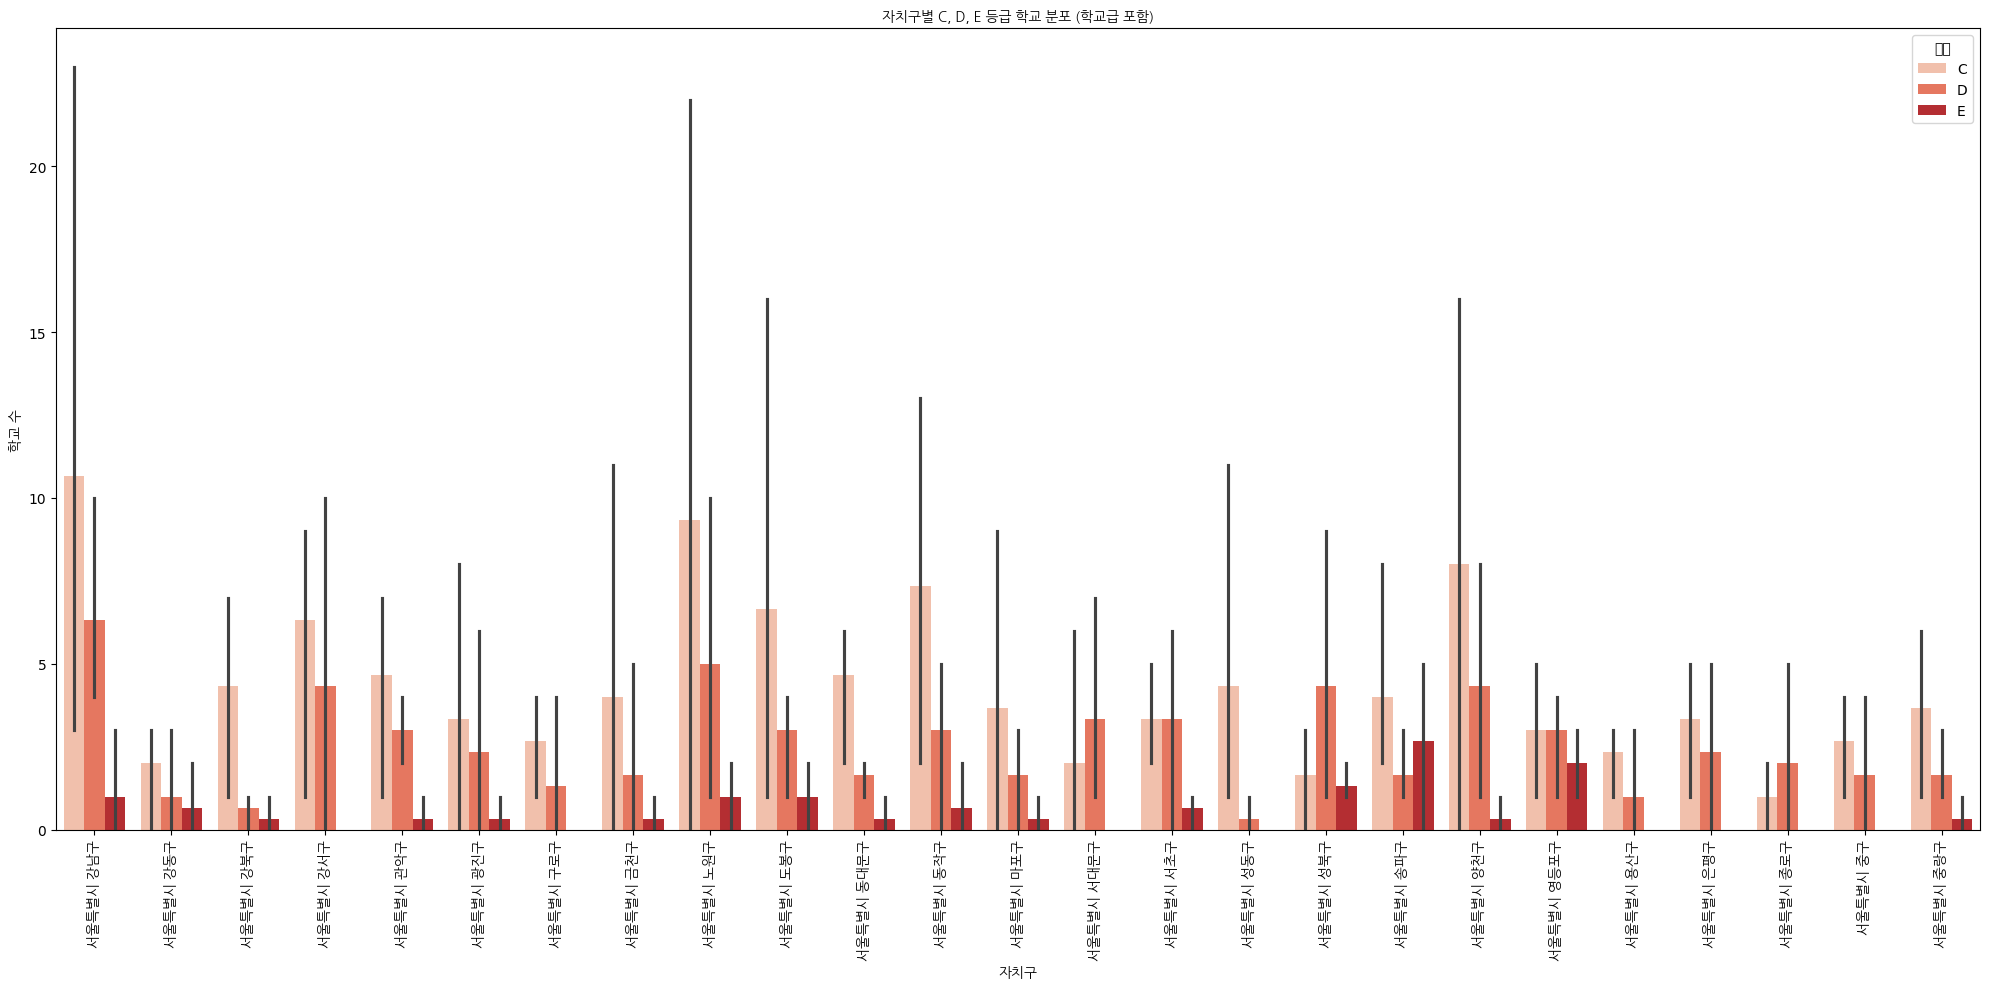

In [ ]:
# 학교급 추정
df['학교급'] = df['SCHUL_NM'].apply(
    lambda x: '초등학교' if '초' in str(x) else ('중학교' if '중' in str(x) else ('고등학교' if '고' in str(x) else '기타'))
)

# C, D, E 등급 필터링
target_grades = ['C', 'D', 'E']
df_filtered = df[df["SAFETY_GRADE"].isin(target_grades)]

# 지역별 등급별 학교 수 카운트 (학교급 포함)
grade_counts = df_filtered.groupby(["ADRCD_NM", "학교급", "SAFETY_GRADE"]).size().reset_index(name="학교 수")

# 시각화: 자치구별 학교급별 등급 분포
plt.figure(figsize=(20, 10))
sns.barplot(
    data=grade_counts,
    x="ADRCD_NM", y="학교 수",
    hue="SAFETY_GRADE",
    hue_order=["C", "D", "E"],
    palette="Reds"
)
plt.xticks(rotation=90)
plt.title("자치구별 C, D, E 등급 학교 분포 (학교급 포함)", fontproperties = font_prop)
plt.xlabel("자치구", fontproperties = font_prop)
plt.xticks(fontproperties = font_prop)
plt.ylabel("학교 수", fontproperties = font_prop)
plt.legend(title="등급")
plt.tight_layout()
plt.show()


In [ ]:
# 1. C, D, E 등급만 필터링
target_grades = ['C', 'D', 'E']
df_high_filtered = df_high[df_high["SAFETY_GRADE"].isin(target_grades)].copy()
df_low_filtered = df_low[df_low["SAFETY_GRADE"].isin(target_grades)].copy()

# 2. 학교급 재추정
df_high_filtered['학교급'] = df_high_filtered['SCHUL_NM'].apply(
    lambda x: '초등학교' if '초' in str(x) else ('중학교' if '중' in str(x) else ('고등학교' if '고' in str(x) else '기타'))
)
df_low_filtered['학교급'] = df_low_filtered['SCHUL_NM'].apply(
    lambda x: '초등학교' if '초' in str(x) else ('중학교' if '중' in str(x) else ('고등학교' if '고' in str(x) else '기타'))
)

# 3. 그룹화
high_grouped = df_high_filtered.groupby(["ADRCD_NM", "SAFETY_GRADE"]).size().reset_index(name="상반기 학교 수")
low_grouped = df_low_filtered.groupby(["ADRCD_NM", "SAFETY_GRADE"]).size().reset_index(name="하반기 학교 수")

# 4. 병합
merged = pd.merge(
    high_grouped,
    low_grouped,
    how="outer",
    on=["ADRCD_NM", "SAFETY_GRADE"]
)

# 5. 정렬 및 필터링
merged = merged.sort_values(by=["ADRCD_NM", "SAFETY_GRADE"])
merged = merged[merged["SAFETY_GRADE"].isin(["C", "D", "E"])]

# 출력
print("C, D, E 등급 학교 수 상/하반기 비교 (학교급 포함)")
display(merged)


C, D, E 등급 학교 수 상/하반기 비교 (학교급 포함)


,ADRCD_NM,SAFETY_GRADE,상반기 학교 수,하반기 학교 수
2,서울특별시 강남구,C,19,13.0
3,서울특별시 강남구,D,11,8.0
4,서울특별시 강남구,E,2,1.0
7,서울특별시 강동구,C,2,4.0
8,서울특별시 강동구,D,3,0.0
...,...,...,...,...
118,서울특별시 중구,D,5,NaN
119,서울특별시 중구,E,0,NaN
122,서울특별시 중랑구,C,7,4.0
123,서울특별시 중랑구,D,2,3.0


In [ ]:
# C,D,E로 전이된 지역을 중심으로 분석
# 전이 구조: 상반기 등급 → 하반기 등급

# 상/하반기에서 학교급 추정
df_high['학교급'] = df_high['SCHUL_NM'].apply(
    lambda x: '초등학교' if '초' in str(x) else ('중학교' if '중' in str(x) else ('고등학교' if '고' in str(x) else '기타'))
)
df_low['학교급'] = df_low['SCHUL_NM'].apply(
    lambda x: '초등학교' if '초' in str(x) else ('중학교' if '중' in str(x) else ('고등학교' if '고' in str(x) else '기타'))
)

# 병합을 위한 키 설정
merge_keys = ["SCHUL_CODE", "학교급", "ADRCD_NM"]

# 상/하반기 주요 열 선택 및 병합
df_high_subset = df_high[merge_keys + ["SAFETY_GRADE"]].rename(columns={"SAFETY_GRADE": "상반기등급"})
df_low_subset = df_low[merge_keys + ["SAFETY_GRADE"]].rename(columns={"SAFETY_GRADE": "하반기등급"})
merged_transition = pd.merge(df_high_subset, df_low_subset, on=merge_keys, how="inner")

# 전이 수 카운트: 자치구 + 상반기 → 하반기
transition_counts = merged_transition.groupby(["ADRCD_NM", "상반기등급", "하반기등급"]).size().reset_index(name="학교 수")

# C, D, E로 전이된 경우 각각 필터링
to_C = transition_counts[transition_counts["하반기등급"] == "C"].sort_values(by="학교 수", ascending=False)
to_D = transition_counts[transition_counts["하반기등급"] == "D"].sort_values(by="학교 수", ascending=False)
to_E = transition_counts[transition_counts["하반기등급"] == "E"].sort_values(by="학교 수", ascending=False)

# 출력
print("📉 C 등급으로 전이된 지역 분석")
display(to_C)

print("\n📉 D 등급으로 전이된 지역 분석")
display(to_D)

print("\n📉 E 등급으로 전이된 지역 분석")
display(to_E)

📉 C 등급으로 전이된 지역 분석


,ADRCD_NM,상반기등급,하반기등급,학교 수
7,서울특별시 강남구,B,C,13
207,서울특별시 노원구,B,C,11
227,서울특별시 도봉구,A,C,10
202,서울특별시 노원구,A,C,8
57,서울특별시 강북구,B,C,7
...,...,...,...,...
587,서울특별시 중구,C,C,0
597,서울특별시 중구,E,C,0
592,서울특별시 중구,D,C,0
617,서울특별시 중랑구,D,C,0



📉 D 등급으로 전이된 지역 분석


,ADRCD_NM,상반기등급,하반기등급,학교 수
8,서울특별시 강남구,B,D,7
93,서울특별시 강서구,D,D,6
83,서울특별시 강서구,B,D,5
208,서울특별시 노원구,B,D,4
343,서울특별시 서대문구,D,D,4
...,...,...,...,...
588,서울특별시 중구,C,D,0
598,서울특별시 중구,E,D,0
593,서울특별시 중구,D,D,0
618,서울특별시 중랑구,D,D,0



📉 E 등급으로 전이된 지역 분석


,ADRCD_NM,상반기등급,하반기등급,학교 수
434,서울특별시 송파구,B,E,6
409,서울특별시 성북구,B,E,6
484,서울특별시 영등포구,B,E,5
289,서울특별시 동작구,C,E,3
134,서울특별시 광진구,B,E,2
...,...,...,...,...
604,서울특별시 중랑구,A,E,0
609,서울특별시 중랑구,B,E,0
614,서울특별시 중랑구,C,E,0
619,서울특별시 중랑구,D,E,0


In [ ]:
# 등급을 숫자로 매핑: A=1, ..., E=5
grade_to_num = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}

# 등급 문자 → 숫자 매핑 후 int로 변환
merged_transition["상반기등급_num"] = merged_transition["상반기등급"].map(grade_to_num).astype(int)
merged_transition["하반기등급_num"] = merged_transition["하반기등급"].map(grade_to_num).astype(int)

# 등급 변화량 계산 (양수면 하락)
merged_transition["등급변화"] = merged_transition["하반기등급_num"] - merged_transition["상반기등급_num"]


# 등급이 2단계 이상 하락한 학교 (변화량 ≥ 2)
downgraded = merged_transition[merged_transition["등급변화"] >= 2]

# 자치구별로 하락한 학교 수 집계
region_downgrade_counts = downgraded.groupby("ADRCD_NM").size().reset_index(name="등급 2단계 이상 하락 학교 수")

# 출력
print(" 등급이 2단계 이상 하락한 학교 목록")
display(downgraded)

print("\n 등급이 많이 하락한 지역 TOP")
display(region_downgrade_counts.sort_values(by="등급 2단계 이상 하락 학교 수", ascending=False))


 등급이 2단계 이상 하락한 학교 목록


,SCHUL_CODE,학교급,ADRCD_NM,상반기등급,하반기등급,상반기등급_num,하반기등급_num,등급변화
56,S010000769,초등학교,서울특별시 강남구,A,D,1,4,3
134,S010000919,초등학교,서울특별시 송파구,B,E,2,5,3
135,S010000919,초등학교,서울특별시 송파구,B,E,2,5,3
202,S010000954,초등학교,서울특별시 강동구,A,C,1,3,2
226,S010001016,초등학교,서울특별시 강서구,B,D,2,4,2
...,...,...,...,...,...,...,...,...
3650,S010000463,초등학교,서울특별시 서초구,A,C,1,3,2
3653,S010000464,고등학교,서울특별시 성북구,A,E,1,5,4
3666,S010000491,고등학교,서울특별시 서초구,A,C,1,3,2
3757,S010005206,고등학교,서울특별시 도봉구,A,D,1,4,3



 등급이 많이 하락한 지역 TOP


,ADRCD_NM,등급 2단계 이상 하락 학교 수
7,서울특별시 노원구,17
8,서울특별시 도봉구,15
14,서울특별시 성북구,13
0,서울특별시 강남구,13
17,서울특별시 영등포구,11
15,서울특별시 송파구,9
12,서울특별시 서초구,8
2,서울특별시 강서구,8
13,서울특별시 성동구,7
6,서울특별시 금천구,7


📉 등급 하락 학교들의 평균 점수 변화량 (음수일수록 악화):
ITENI_SCORE_변화량            -0.035136
NSE_SCORE_변화량              -0.018808
FALL_BACT_SCORE_변화량         0.000367
MNUT_DST_SCORE_변화량          0.002424
GMNSM_MNUT_DST_SCORE_변화량    0.036262
BENZENE_SCORE_변화량           0.047238
ULTRA_DST_SCORE_변화량         0.050209
STYLENE_SCORE_변화량           0.054326
XYLENE_SCORE_변화량            0.055978
TOLUENE_SCORE_변화량           0.056934
ETHY_BENZENE_SCORE_변화량      0.058149
MITE_SCORE_변화량              0.059432
VOCS_SCORE_변화량              0.067652
NO2_SCORE_변화량               0.071888
AIR_BACT_SCORE_변화량          0.078938
HCHO_SCORE_변화량              0.083875
CO_SCORE_변화량                0.089736
DES_ITENI_SCORE_변화량         0.109775
BLKB_ITENI_SCORE_변화량        0.110169
TOTAL_WEIGHTED_SCORE_변화량    0.125308
O3_SCORE_변화량                0.160563
RN_SCORE_변화량                0.176642
ASBESTOS_SCORE_변화량          0.219283
dtype: float64


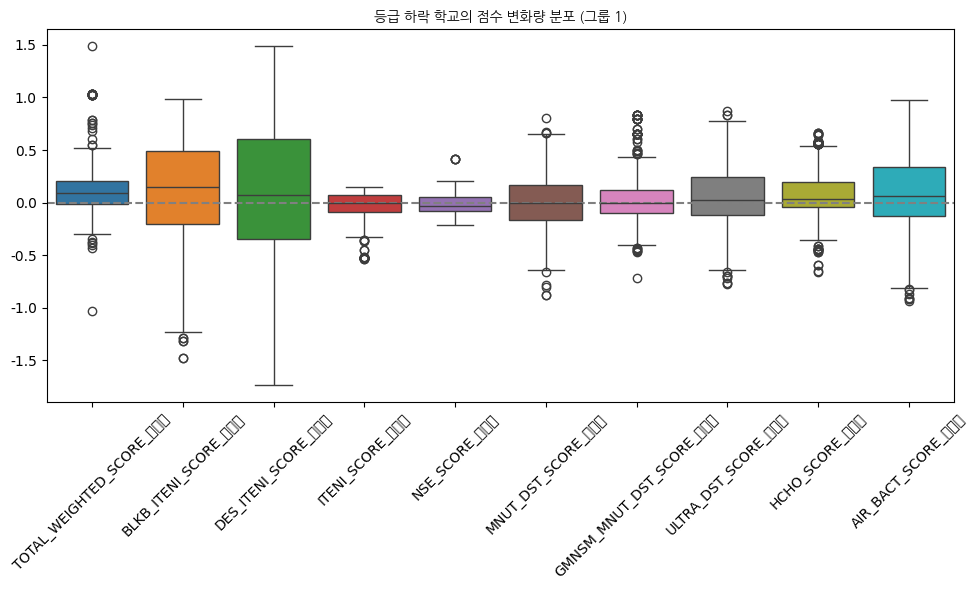

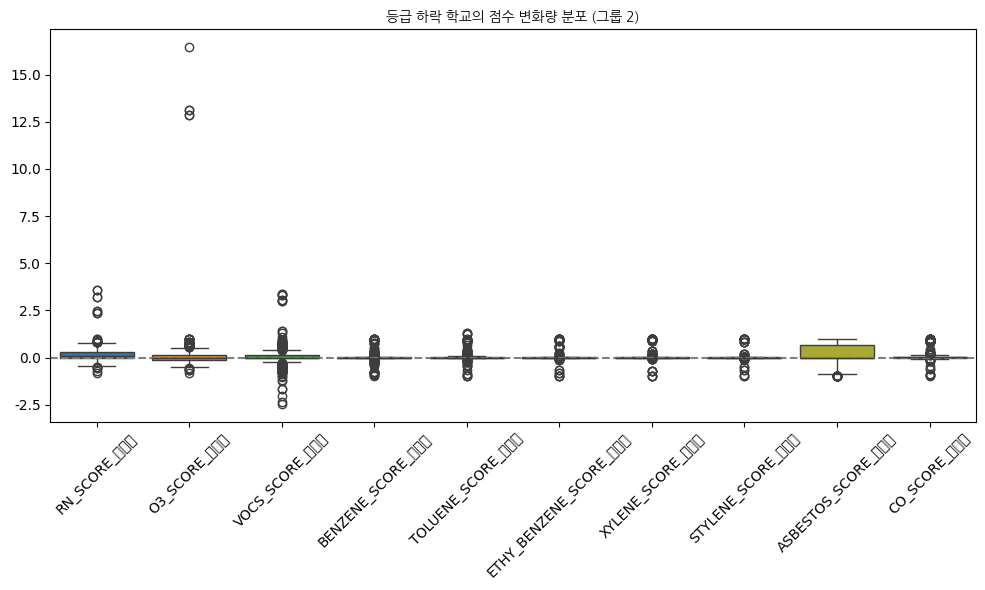

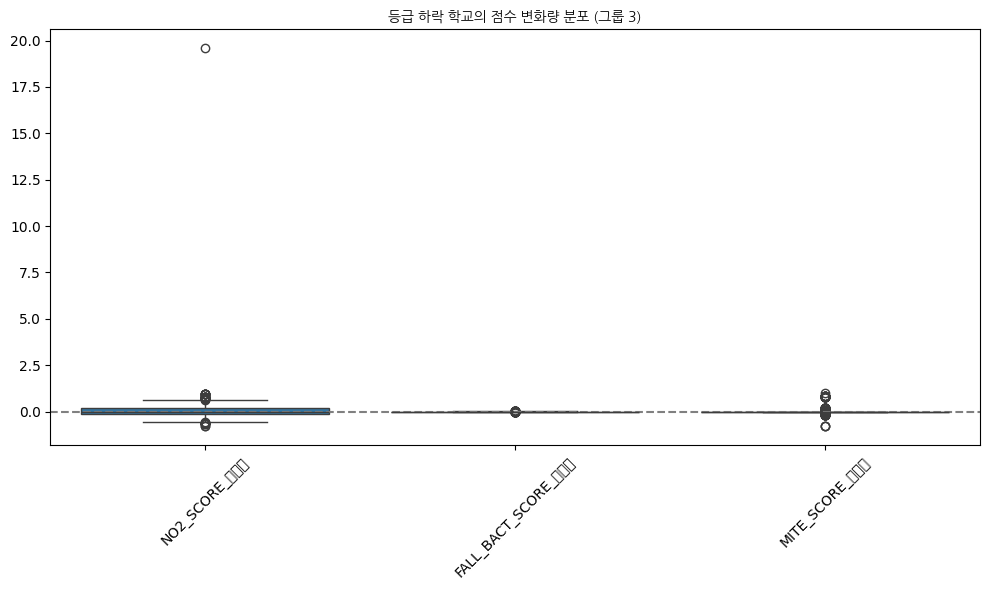

In [ ]:
# 병합: 점수 포함
score_cols = ['TOTAL_WEIGHTED_SCORE', 'BLKB_ITENI_SCORE', 'DES_ITENI_SCORE',
              'ITENI_SCORE', 'NSE_SCORE', 'MNUT_DST_SCORE', 'GMNSM_MNUT_DST_SCORE',
              'ULTRA_DST_SCORE', 'HCHO_SCORE', 'AIR_BACT_SCORE', 'RN_SCORE', 'O3_SCORE',
              'VOCS_SCORE', 'BENZENE_SCORE', 'TOLUENE_SCORE', 'ETHY_BENZENE_SCORE',
              'XYLENE_SCORE', 'STYLENE_SCORE', 'ASBESTOS_SCORE', 'CO_SCORE', 'NO2_SCORE',
              'FALL_BACT_SCORE', 'MITE_SCORE']
# downgraded_scores 다시 정의
score_high = df_high[["SCHUL_CODE"] + score_cols].rename(columns={col: col + "_상" for col in score_cols})
score_low = df_low[["SCHUL_CODE"] + score_cols].rename(columns={col: col + "_하" for col in score_cols})
score_merged = pd.merge(score_high, score_low, on="SCHUL_CODE")
downgraded_scores = pd.merge(downgraded, score_merged, on="SCHUL_CODE", how="left")

# 변화량 다시 계산
for col in score_cols:
    downgraded_scores[f"{col}_변화량"] = downgraded_scores[f"{col}_하"] - downgraded_scores[f"{col}_상"]
# 평균 변화량 확인
mean_changes = downgraded_scores[[f"{col}_변화량" for col in score_cols]].mean().sort_values()
print("📉 등급 하락 학교들의 평균 점수 변화량 :")
print(mean_changes)


# 항목을 5개씩 나누어 시각화
n = 10
score_var_sets = [score_cols[i:i+n] for i in range(0, len(score_cols), n)]

# 5개씩 묶어 박스플롯 출력
for i, var_set in enumerate(score_var_sets):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=downgraded_scores[[f"{col}_변화량" for col in var_set]])
    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f"등급 하락 학교의 점수 변화량 분포 (그룹 {i+1})", fontproperties=font_prop)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# 초과치

In [ ]:
limits = {
    'CO2_SCORE': 1500,
    'PM10_SCORE': 75,  # 교실 기준
    'PM25_SCORE': 35,
    'HCHO_SCORE': 100,
    'TVOC_SCORE': 400,
    'BENZENE_SCORE': 30,
    'TOLUENE_SCORE': 1000,
    'ETHY_BENZENE_SCORE': 360,
    'XYLENE_SCORE': 700,
    'STYLENE_SCORE': 300,
    'ASBESTOS_SCORE': 0.01,
    'CO_SCORE': 10,
    'NO2_SCORE': 0.05,
    'RN_SCORE': 148,  # 단위 환산 필요 시 보정
    'AIR_BACT_SCORE': 800,
    'FALL_BACT_SCORE': 10,
    'MITE_SCORE': 100,
    'O3_SCORE': 0.06
}

# 초과 여부 계산 함수
def count_exceed(df, limits):
    exceed = {}
    for material, limit in limits.items():
        if material in df.columns:
            exceed[material] = (df[material] > limit).sum()
    return exceed

# 전체 데이터 (df_high + df_low 병합으로 가정)
df_all = pd.concat([df_high, df_low], ignore_index=True)

# 초과 수 계산
exceed_counts_all = count_exceed(df_all, limits)
exceed_counts_high = count_exceed(df_high, limits)
exceed_counts_low = count_exceed(df_low, limits)

# 하나의 테이블로 통합
exceed_df_all = pd.DataFrame({
    '전체 초과 수': pd.Series(exceed_counts_all),
    '상반기 초과 수': pd.Series(exceed_counts_high),
    '하반기 초과 수': pd.Series(exceed_counts_low)
}).fillna(0).astype(int)

# 총합 기준 정렬
exceed_df_all["총합"] = exceed_df_all["전체 초과 수"] + exceed_df_all["상반기 초과 수"] + exceed_df_all["하반기 초과 수"]
exceed_df_all = exceed_df_all.sort_values(by="총합", ascending=False).drop(columns="총합")


print("초과한 학교")
display(exceed_df_all)




초과한 학교


,전체 초과 수,상반기 초과 수,하반기 초과 수
NO2_SCORE,3652,1873,1779
O3_SCORE,3498,1797,1701
ASBESTOS_SCORE,2745,1612,1133
TOLUENE_SCORE,0,0,0
HCHO_SCORE,0,0,0
BENZENE_SCORE,0,0,0
STYLENE_SCORE,0,0,0
XYLENE_SCORE,0,0,0
ETHY_BENZENE_SCORE,0,0,0
CO_SCORE,0,0,0


1. 이산화질소
2. 오존
3. 석면
순으로 초과치가 많음. 상반기에 초과치가 더 많음.


---


이산화질소와 오존은 100개밖에 차이나지 않지만, 석면의 경우 약 480개의 차이가 남

In [ ]:
#------------------
#  상반기
#------------------

# 초과 여부를 나타내는 컬럼 생성
target_columns = ['NO2_SCORE', 'O3_SCORE', 'ASBESTOS_SCORE']
for col in target_columns:
    df_high[f'{col}_초과'] = df_high[col] > limits[col]

# 초과 항목 수 계산
df_high['초과항목수'] = df_low[[f'{col}_초과' for col in target_columns]].sum(axis=1)

# 2개 초과한 학교 리스트
over2 = df_high[df_high['초과항목수'] == 2][['SCHUL_CODE', 'SCHUL_NM', 'ADRCD_NM', 'SAFETY_GRADE'] + target_columns]

# 3개 모두 초과한 학교 리스트
over3 = df_high[df_high['초과항목수'] == 3][['SCHUL_CODE', 'SCHUL_NM', 'ADRCD_NM', 'SAFETY_GRADE'] + target_columns]

# 등급 분포 확인
grade_dist_2 = over2['SAFETY_GRADE'].value_counts().sort_index()
grade_dist_3 = over3['SAFETY_GRADE'].value_counts().sort_index()


# 등급 분포 테이블 정리 (int 변환 X)
grade_summary = pd.DataFrame({
    '등급': grade_dist_2.index.union(grade_dist_3.index),
    '2개 초과 학교 수': grade_dist_2,
    '3개 초과 학교 수': grade_dist_3
})


print("2개 초과한 학교")
display(over2)

print("\n3개 모두 초과한 학교")
display(over3)

print("\n등급 분포")
display(grade_summary)


# 자치구별 초과 학교 수 계산 (이어지는 코드)
region_over2 = over2['ADRCD_NM'].value_counts().sort_values(ascending=False).reset_index()
region_over2.columns = ['자치구', '2개 초과 학교 수']

region_over3 = over3['ADRCD_NM'].value_counts().sort_values(ascending=False).reset_index()
region_over3.columns = ['자치구', '3개 초과 학교 수']

# 병합하여 하나의 테이블로 정리
region_summary = pd.merge(region_over2, region_over3, on='자치구', how='outer').fillna(0)
region_summary[['2개 초과 학교 수', '3개 초과 학교 수']] = region_summary[['2개 초과 학교 수', '3개 초과 학교 수']].astype(int)


print("2개·3개 초과 학교 자치구별 분포")
display(region_summary)

2개 초과한 학교


,SCHUL_CODE,SCHUL_NM,ADRCD_NM,SAFETY_GRADE,NO2_SCORE,O3_SCORE,ASBESTOS_SCORE
0,S010000738,서울개일초등학교,서울특별시 강남구,C,0.200000,0.416667,1.000000
1,S010000741,서울구룡초등학교,서울특별시 강남구,D,0.580000,0.116667,0.357906
4,S010000744,서울대도초등학교,서울특별시 강남구,A,0.400000,0.166667,0.200000
7,S010000747,서울대진초등학교,서울특별시 강남구,D,0.460000,0.150000,1.000000
8,S010000748,서울대청초등학교,서울특별시 강남구,C,0.300000,0.416667,1.000000
...,...,...,...,...,...,...,...
1881,S010005205,자운고등학교,서울특별시 도봉구,A,0.295315,0.166667,0.246610
1884,S010005209,경일고등학교,서울특별시 성동구,B,0.200000,0.166667,0.246610
1894,S010005498,문정고등학교,서울특별시 송파구,B,0.300000,0.183333,0.246610
1902,S010005525,진관고등학교,서울특별시 은평구,C,0.400000,0.333333,0.246610



3개 모두 초과한 학교


,SCHUL_CODE,SCHUL_NM,ADRCD_NM,SAFETY_GRADE,NO2_SCORE,O3_SCORE,ASBESTOS_SCORE
2,S010000742,서울논현초등학교,서울특별시 강남구,B,0.220000,0.300000,0.400000
3,S010000743,서울대곡초등학교,서울특별시 강남구,C,0.300000,0.300000,1.000000
5,S010000745,서울대모초등학교,서울특별시 강남구,B,0.280947,0.283333,0.394444
6,S010000746,서울대왕초등학교,서울특별시 강남구,D,0.400000,0.383333,0.196552
9,S010000749,서울대치초등학교,서울특별시 강남구,C,0.200000,0.166667,1.000000
...,...,...,...,...,...,...,...
1910,S010005583,은평고등학교,서울특별시 은평구,A,0.340000,0.183333,0.246610
1911,S010005591,가재울고등학교,서울특별시 서대문구,B,0.400000,0.500000,0.000000
1912,S010006381,금호고등학교,서울특별시 성동구,A,0.200000,0.500000,0.095000
1913,S010006382,도선고등학교,서울특별시 성동구,A,0.200000,0.166667,0.095000



등급 분포


,등급,2개 초과 학교 수,3개 초과 학교 수
SAFETY_GRADE,,,
A,A,271,325
B,B,359,452
C,C,89,107
D,D,48,76
E,E,7,13


2개·3개 초과 학교 자치구별 분포


,자치구,2개 초과 학교 수,3개 초과 학교 수
0,서울특별시 강남구,37,60
1,서울특별시 강동구,35,34
2,서울특별시 강북구,19,27
3,서울특별시 강서구,32,73
4,서울특별시 관악구,36,40
5,서울특별시 광진구,12,45
6,서울특별시 구로구,48,39
7,서울특별시 금천구,30,21
8,서울특별시 노원구,55,65
9,서울특별시 도봉구,37,32


In [ ]:
#------------------
#  하반기
#------------------
# 초과 여부를 나타내는 컬럼 생성
target_columns = ['NO2_SCORE', 'O3_SCORE', 'ASBESTOS_SCORE']
for col in target_columns:
    df_low[f'{col}_초과'] = df_low[col] > limits[col]

# 초과 항목 수 계산
df_low['초과항목수'] = df_low[[f'{col}_초과' for col in target_columns]].sum(axis=1)

# 2개 초과한 학교 리스트
over2 = df_low[df_low['초과항목수'] == 2][['SCHUL_CODE', 'SCHUL_NM', 'ADRCD_NM', 'SAFETY_GRADE'] + target_columns]

# 3개 모두 초과한 학교 리스트
over3 = df_low[df_low['초과항목수'] == 3][['SCHUL_CODE', 'SCHUL_NM', 'ADRCD_NM', 'SAFETY_GRADE'] + target_columns]

# 등급 분포 확인
grade_dist_2 = over2['SAFETY_GRADE'].value_counts().sort_index()
grade_dist_3 = over3['SAFETY_GRADE'].value_counts().sort_index()


# 등급 분포 테이블 정리 (int 변환 X)
grade_summary = pd.DataFrame({
    '등급': grade_dist_2.index.union(grade_dist_3.index),
    '2개 초과 학교 수': grade_dist_2,
    '3개 초과 학교 수': grade_dist_3
})


print("2개 초과한 학교")
display(over2)

print("\n3개 모두 초과한 학교")
display(over3)

print("\n등급 분포")
display(grade_summary)


# 자치구별 초과 학교 수 계산 (이어지는 코드)
region_over2 = over2['ADRCD_NM'].value_counts().sort_values(ascending=False).reset_index()
region_over2.columns = ['자치구', '2개 초과 학교 수']

region_over3 = over3['ADRCD_NM'].value_counts().sort_values(ascending=False).reset_index()
region_over3.columns = ['자치구', '3개 초과 학교 수']

# 병합하여 하나의 테이블로 정리
region_summary = pd.merge(region_over2, region_over3, on='자치구', how='outer').fillna(0)
region_summary[['2개 초과 학교 수', '3개 초과 학교 수']] = region_summary[['2개 초과 학교 수', '3개 초과 학교 수']].astype(int)


print("2개·3개 초과 학교 자치구별 분포")
display(region_summary)

2개 초과한 학교


,SCHUL_CODE,SCHUL_NM,ADRCD_NM,SAFETY_GRADE,NO2_SCORE,O3_SCORE,ASBESTOS_SCORE
0,S010000738,서울개일초등학교,서울특별시 강남구,A,0.4,0.333333,0.000000
1,S010000741,서울구룡초등학교,서울특별시 강남구,B,0.0,0.166667,0.357906
4,S010000744,서울대도초등학교,서울특별시 강남구,A,0.4,0.333333,0.000000
7,S010000747,서울대진초등학교,서울특별시 강남구,B,0.0,0.500000,1.000000
8,S010000748,서울대청초등학교,서울특별시 강남구,B,0.0,0.333333,1.000000
...,...,...,...,...,...,...,...
1881,S010005204,신현고등학교,서울특별시 중랑구,A,0.2,0.166667,0.000000
1884,S010005208,등촌고등학교,서울특별시 강서구,A,0.2,0.166667,0.000000
1894,S010005494,서울국제고등학교,서울특별시 종로구,A,0.0,0.166667,0.246610
1902,S010005524,문현고등학교,서울특별시 송파구,A,0.2,0.166667,0.000000



3개 모두 초과한 학교


,SCHUL_CODE,SCHUL_NM,ADRCD_NM,SAFETY_GRADE,NO2_SCORE,O3_SCORE,ASBESTOS_SCORE
2,S010000742,서울논현초등학교,서울특별시 강남구,C,0.200000,0.333333,1.000000
3,S010000743,서울대곡초등학교,서울특별시 강남구,B,0.280947,0.166667,0.357906
5,S010000745,서울대모초등학교,서울특별시 강남구,B,0.280947,0.166667,0.394444
6,S010000746,서울대왕초등학교,서울특별시 강남구,A,0.200000,0.333333,0.196552
9,S010000749,서울대치초등학교,서울특별시 강남구,B,0.200000,0.166667,1.000000
...,...,...,...,...,...,...,...
1911,S010005583,은평고등학교,서울특별시 은평구,B,0.200000,0.166667,0.246610
1912,S010005591,가재울고등학교,서울특별시 서대문구,B,0.400000,0.333333,0.095000
1913,S010006381,금호고등학교,서울특별시 성동구,A,0.600000,0.166667,0.095000
1914,S010006382,도선고등학교,서울특별시 성동구,A,0.200000,0.166667,0.095000



등급 분포


,등급,2개 초과 학교 수,3개 초과 학교 수
SAFETY_GRADE,,,
A,A,500,322
B,B,250,493
C,C,16,98
D,D,4,51
E,E,4,10


2개·3개 초과 학교 자치구별 분포


,자치구,2개 초과 학교 수,3개 초과 학교 수
0,서울특별시 강남구,38,59
1,서울특별시 강동구,34,28
2,서울특별시 강북구,24,23
3,서울특별시 강서구,28,80
4,서울특별시 관악구,45,32
5,서울특별시 광진구,17,37
6,서울특별시 구로구,45,45
7,서울특별시 금천구,31,18
8,서울특별시 노원구,52,71
9,서울특별시 도봉구,40,30


# 점수 간 상관관계 분석
- 23개 항목 간 상관계수 계산 → 계층적 군집화

- 동일 클러스터에 속한 항목들 간 유사한 패턴

- 각 클러스터당 1개 대표 항목 선정 (측정 비용 감소 및 행정 효율성 확보)

근데 유의미한게 하나밖에 안나오네.......... ㅠㅠ

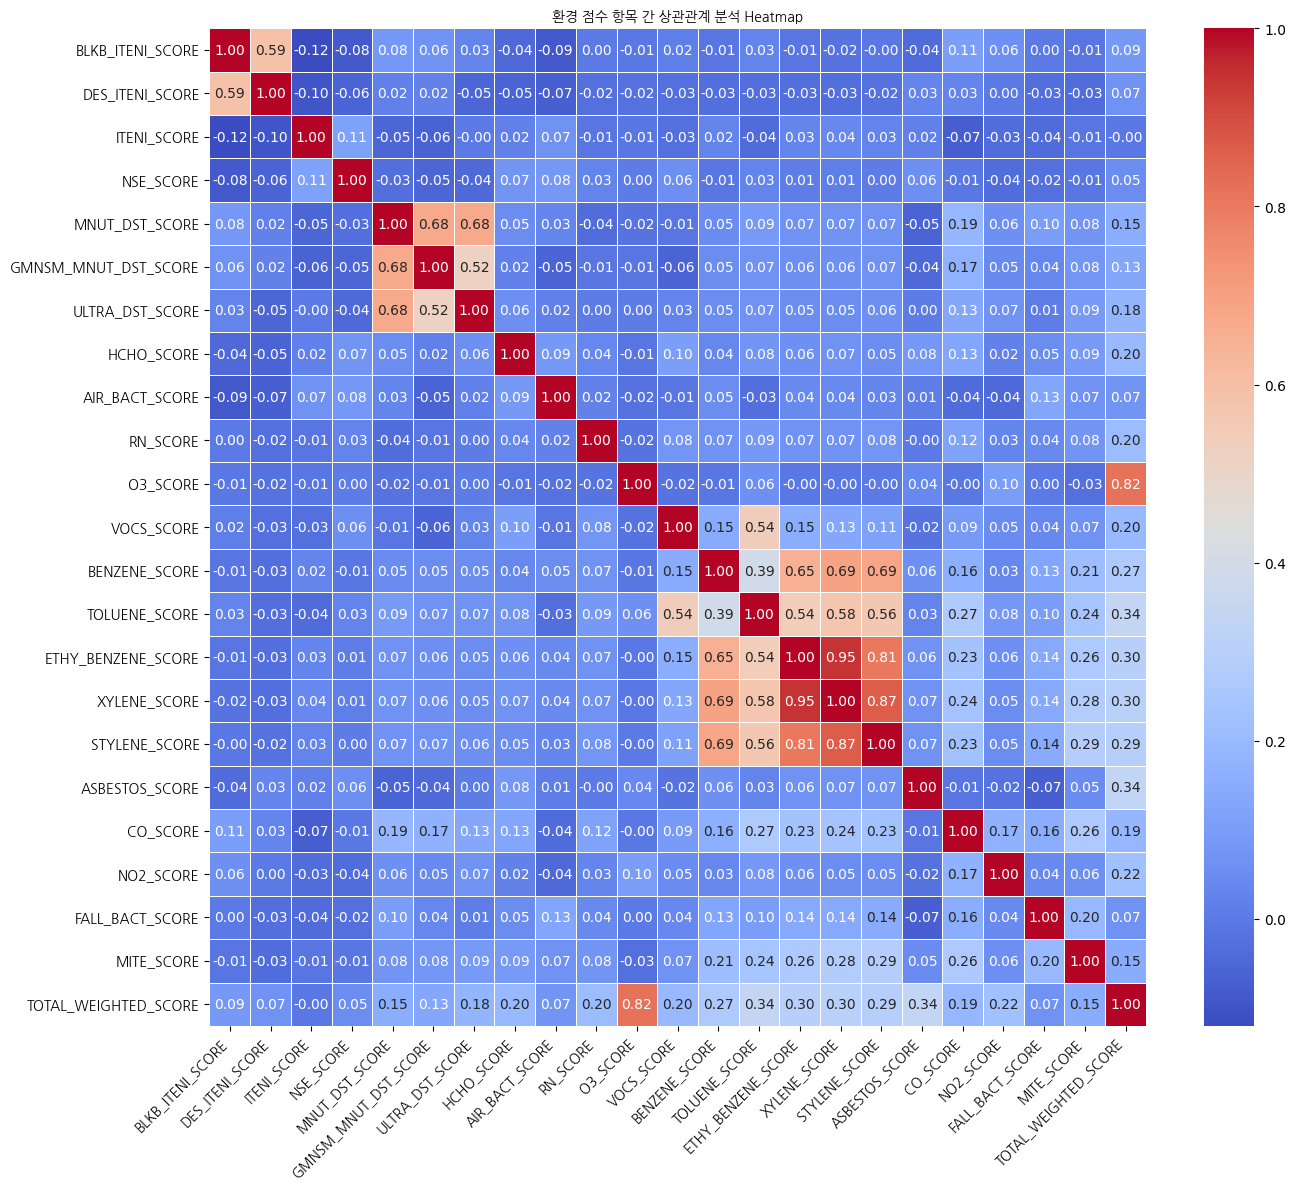

In [ ]:
# '_점수'로 끝나는 점수 항목만 추출
score_columns = [col for col in df.columns if col.endswith('_SCORE')]
df_scores = df[score_columns]

# 상관계수 행렬 계산
corr_matrix = df_scores.corr()

# 시각화 (heatmap)
plt.figure(figsize=(14, 12))
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# 제목
plt.title("환경 점수 항목 간 상관관계 분석 Heatmap", fontproperties=font_prop)

# x축/ y축 tick label에 font 적용
ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font_prop, rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), fontproperties=font_prop, rotation=0)

plt.tight_layout()
plt.show()

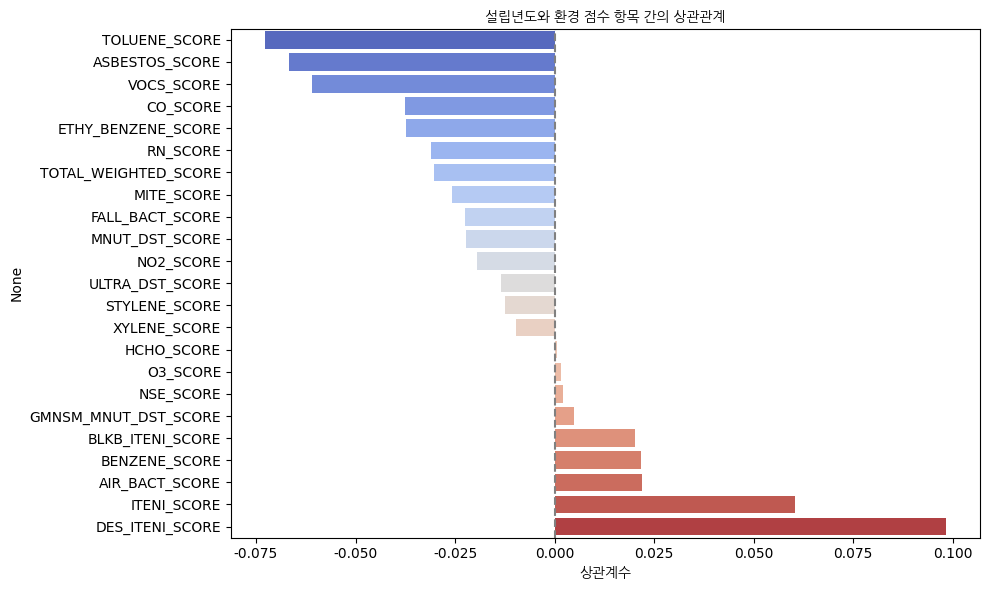

In [ ]:
df["설립년도"] = pd.to_numeric(df["공시년도"], errors="coerce")

# 점수 항목 중 '_SCORE'로 끝나는 컬럼 추출
score_columns = [col for col in df.columns if col.endswith('_SCORE') and df[col].dtype != 'object']

# 설립년도 + 점수만 추출
df_corr = df[['공시년도'] + score_columns].dropna()

# 상관계수 계산
year_corr = df_corr.corr().loc['공시년도'].drop('공시년도')  # 설립년도와의 상관관계만 추출

# 상관계수 정렬
year_corr_sorted = year_corr.sort_values()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=year_corr_sorted.values, y=year_corr_sorted.index, palette='coolwarm')
plt.title("설립년도와 환경 점수 항목 간의 상관관계", fontproperties=font_prop)
plt.xlabel("상관계수", fontproperties = font_prop)
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


### 대표 항목만 체크

우리가 준 가중치를 검증할 수 있지 않나...
데이터 기반 대표 물질을 줄이는 데 상관관계 분석은 유의미할것.

특히 고위험군 VOC 계열을 통합 관리할 수 있다면, 정책 설계나 예산 측면에서도 매우 유리할것.

✅ 포함항목
정의:
같은 클러스터로 분류된 항목들
즉, 상관관계가 높아서 비슷한 패턴을 보이는 항목들끼리 한 덩어리로 묶은 것

- 기준:
항목 간 상관계수를 기반으로 거리(1 - 상관계수)를 계산

- linkage()를 통해 계층적 군집(hierarchical clustering) 수행

- fcluster()로 n개의 클러스터로 쪼갬

그 결과, 같은 클러스터 ID를 갖는 항목들을 **"포함항목"**으로 봄


✅ 대표항목
정의:
해당 클러스터 안에서, 다른 포함항목들과의 거리 합이 가장 작은 항목

즉, 클러스터 안의 중심 역할을 하는 가장 전형적인 항목


In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

# 점수 항목만 추출
score_columns = [col for col in df.columns if col.endswith('_SCORE')]
df_scores = df[score_columns]

# ① 상관관계 행렬 계산
corr_matrix = df_scores.corr()

# ② 거리 행렬로 변환 (1 - 상관계수)
distance_matrix = 1 - corr_matrix

# ③ 계층적 클러스터링 수행
linkage_matrix = linkage(squareform(distance_matrix), method='average')

# ④ 원하는 클러스터 수 지정 (예: 4개)
num_clusters = 4
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# ⑤ 클러스터별 대표 항목 선택 (거리합이 가장 작은 항목)
cluster_map = {}
for cluster_id in range(1, num_clusters + 1):
    members = [col for col, cid in zip(score_columns, clusters) if cid == cluster_id]

    # 대표 항목 = 다른 멤버들과의 거리합이 최소인 항목
    min_total_dist = float('inf')
    representative = None
    for col in members:
        dist_sum = distance_matrix.loc[col, members].sum()
        if dist_sum < min_total_dist:
            min_total_dist = dist_sum
            representative = col

    cluster_map[f'Cluster {cluster_id}'] = {
        '대표항목': representative,
        '포함항목': members
    }

# ⑥ 결과 출력
for cid, info in cluster_map.items():
    print(f"{cid}")
    print(f" - 대표 항목: {info['대표항목']}")
    print(f" - 포함 항목: {', '.join(info['포함항목'])}\n")

Cluster 1
 - 대표 항목: BLKB_ITENI_SCORE
 - 포함 항목: BLKB_ITENI_SCORE, DES_ITENI_SCORE

Cluster 2
 - 대표 항목: NSE_SCORE
 - 포함 항목: ITENI_SCORE, NSE_SCORE, HCHO_SCORE, AIR_BACT_SCORE

Cluster 3
 - 대표 항목: MNUT_DST_SCORE
 - 포함 항목: MNUT_DST_SCORE, GMNSM_MNUT_DST_SCORE, ULTRA_DST_SCORE

Cluster 4
 - 대표 항목: XYLENE_SCORE
 - 포함 항목: RN_SCORE, O3_SCORE, VOCS_SCORE, BENZENE_SCORE, TOLUENE_SCORE, ETHY_BENZENE_SCORE, XYLENE_SCORE, STYLENE_SCORE, ASBESTOS_SCORE, CO_SCORE, NO2_SCORE, FALL_BACT_SCORE, MITE_SCORE, TOTAL_WEIGHTED_SCORE



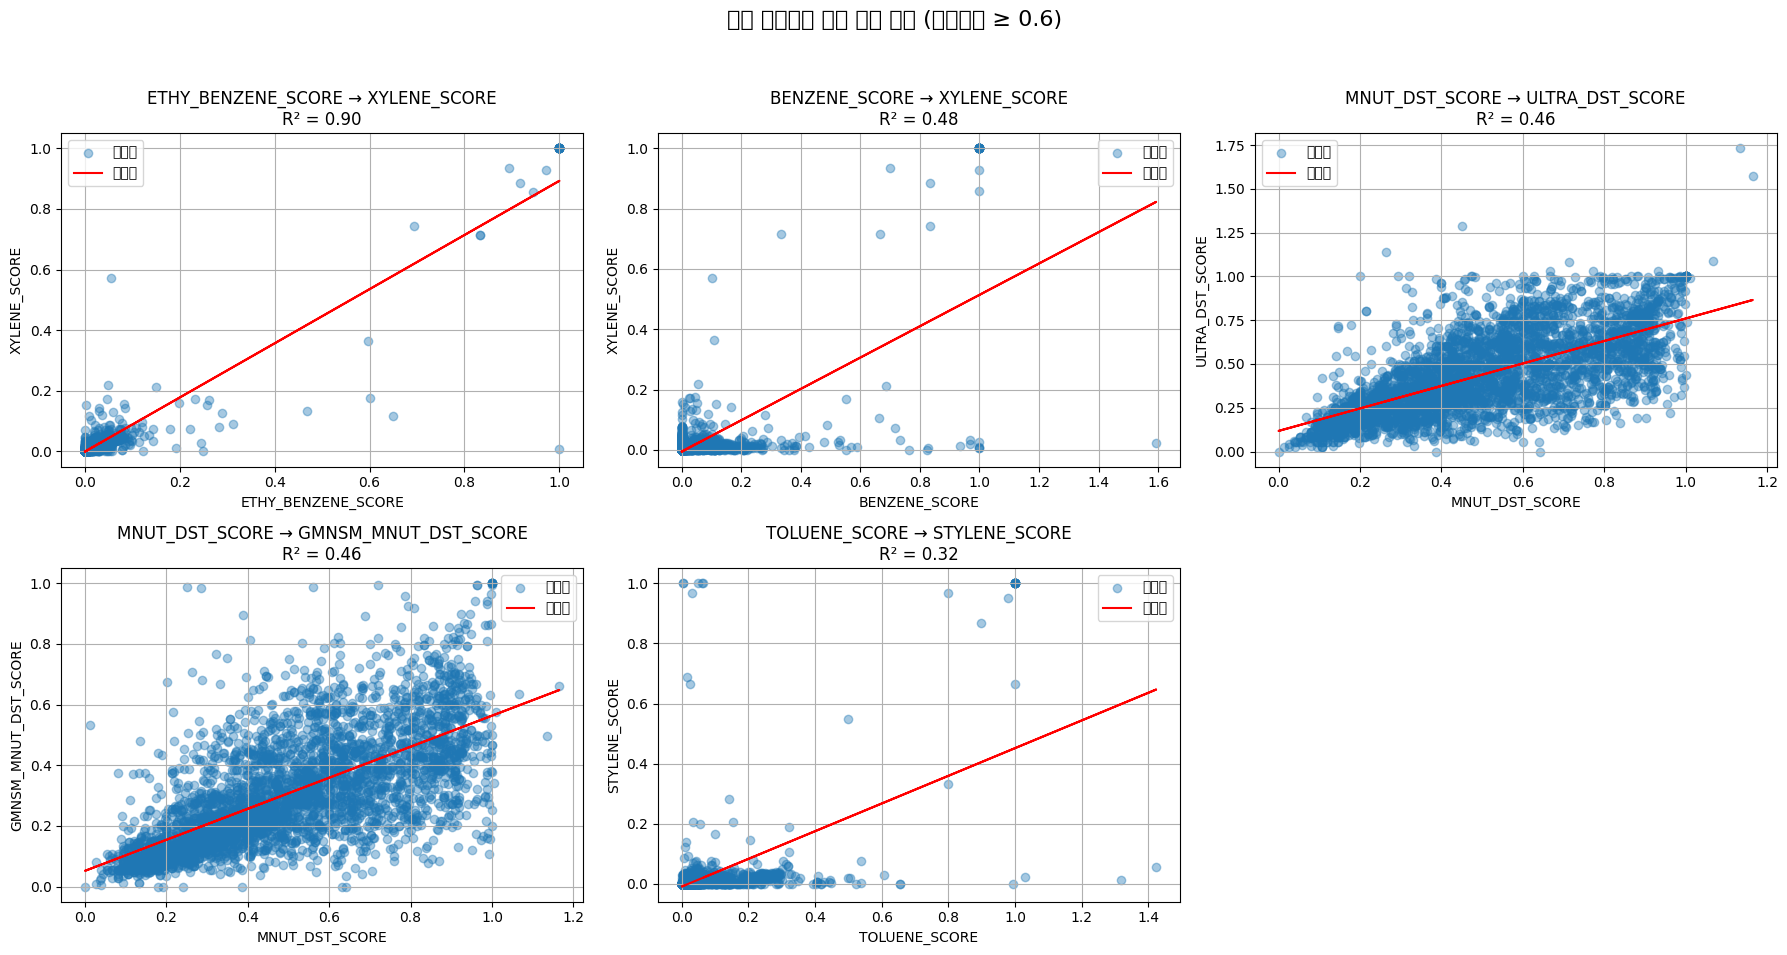

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 데이터 불러오기
df = pd.read_csv("환경위생_통합점수_최종처리_개선(찐최종).csv")

# 상관관계
high_corr_pairs = [
    ('ETHY_BENZENE_SCORE', 'XYLENE_SCORE'),
    ('BENZENE_SCORE', 'XYLENE_SCORE'),
    ('MNUT_DST_SCORE', 'ULTRA_DST_SCORE'),
    ('MNUT_DST_SCORE', 'GMNSM_MNUT_DST_SCORE'),
    ('TOLUENE_SCORE', 'STYLENE_SCORE')
]

# 그래프 시각화
plt.figure(figsize=(18, 10))

for i, (X_col, y_col) in enumerate(high_corr_pairs, 1):
    # 결측치 제거
    df_filtered = df[[X_col, y_col]].dropna()
    X = df_filtered[[X_col]]
    y = df_filtered[y_col]

    # 선형 회귀 학습
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    # 서브플롯
    plt.subplot(2, 3, i)
    plt.scatter(X, y, alpha=0.4, label='실제값')
    plt.plot(X, y_pred, color='red', label='예측선')
    plt.title(f"{X_col} → {y_col}\nR² = {r2:.2f}")
    plt.xlabel(X_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.grid(True)

plt.suptitle("대표 항목으로 다른 항목 예측 (상관계수 ≥ 0.6)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 1. 데이터 불러오기 및 점수 항목 추출
df = pd.read_csv("환경위생_통합점수_최종처리_개선(찐최종).csv")
score_columns = [col for col in df.columns if col.endswith('_SCORE')]
df_scores = df[score_columns]

# 2. 상관계수 기반 거리행렬 생성
corr_matrix = df_scores.corr()
distance_matrix = 1 - corr_matrix

# 3. 계층 클러스터링
linkage_matrix = linkage(squareform(distance_matrix), method='average')
num_clusters = 4
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# 4. 클러스터별 대표/포함 항목 정의
cluster_map = {}
for cluster_id in range(1, num_clusters + 1):
    members = [col for col, cid in zip(score_columns, clusters) if cid == cluster_id]
    # 대표항목 = 거리합이 가장 작은 항목
    rep = min(members, key=lambda col: distance_matrix.loc[col, members].sum())
    cluster_map[f'Cluster {cluster_id}'] = {'대표': rep, '포함': [m for m in members if m != rep]}

# 5. 각 대표항목으로 포함항목 예측 (R² 계산)
results = []
for cluster_id, info in cluster_map.items():
    rep = info['대표']
    for target in info['포함']:
        df_filtered = df[[rep, target]].dropna()
        X = df_filtered[[rep]]
        y = df_filtered[target]
        model = LinearRegression().fit(X, y)
        r2 = r2_score(y, model.predict(X))
        results.append({
            '클러스터': cluster_id,
            '대표항목': rep,
            '포함항목': target,
            'R²': round(r2, 3)
        })

# 6. 결과 출력
results_df = pd.DataFrame(results).sort_values(by='R²', ascending=False)
from IPython.display import display
display(results_df)


,클러스터,대표항목,포함항목,R²
11,Cluster 4,XYLENE_SCORE,ETHY_BENZENE_SCORE,0.895
12,Cluster 4,XYLENE_SCORE,STYLENE_SCORE,0.748
9,Cluster 4,XYLENE_SCORE,BENZENE_SCORE,0.477
5,Cluster 3,MNUT_DST_SCORE,ULTRA_DST_SCORE,0.456
4,Cluster 3,MNUT_DST_SCORE,GMNSM_MNUT_DST_SCORE,0.456
0,Cluster 1,BLKB_ITENI_SCORE,DES_ITENI_SCORE,0.348
10,Cluster 4,XYLENE_SCORE,TOLUENE_SCORE,0.331
18,Cluster 4,XYLENE_SCORE,TOTAL_WEIGHTED_SCORE,0.091
17,Cluster 4,XYLENE_SCORE,MITE_SCORE,0.077
14,Cluster 4,XYLENE_SCORE,CO_SCORE,0.056


In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# 2. 점수 컬럼 + 설립년도 추출
score_columns = [col for col in df.columns if col.endswith('_SCORE')]
df_scores = df[score_columns]
df_year = df['공시년도']

# 3. 상관관계 및 거리 행렬 생성
corr_matrix = df_scores.corr()
distance_matrix = 1 - corr_matrix

# 4. 계층적 클러스터링
linkage_matrix = linkage(squareform(distance_matrix), method='average')
num_clusters = 4
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# 5. 클러스터 대표/포함 항목 매핑
cluster_map = {}
for cluster_id in range(1, num_clusters + 1):
    members = [col for col, cid in zip(score_columns, clusters) if cid == cluster_id]
    rep = min(members, key=lambda col: distance_matrix.loc[col, members].sum())
    cluster_map[f'Cluster {cluster_id}'] = {'대표': rep, '포함': [m for m in members if m != rep]}

# 6. 대표항목 단독 vs 대표항목+설립년도 R² 비교
results = []
for cluster_id, info in cluster_map.items():
    rep = info['대표']
    for target in info['포함']:
        df_filtered = df[[rep, target, '공시년도']].dropna()
        X_single = df_filtered[[rep]]
        X_year = df_filtered[[rep, '공시년도']]
        y = df_filtered[target]

        model_single = LinearRegression().fit(X_single, y)
        r2_single = r2_score(y, model_single.predict(X_single))

        model_combined = LinearRegression().fit(X_year, y)
        r2_combined = r2_score(y, model_combined.predict(X_year))

        results.append({
            '클러스터': cluster_id,
            '대표항목': rep,
            '포함항목': target,
            'R² (단일)': round(r2_single, 3),
            'R² (설립년도 포함)': round(r2_combined, 3),
            '개선폭': round(r2_combined - r2_single, 3)
        })

# 7. 결과 출력
results_df = pd.DataFrame(results).sort_values(by='개선폭', ascending=False)
from IPython.display import display
display(results_df)


,클러스터,대표항목,포함항목,R² (단일),R² (설립년도 포함),개선폭
0,Cluster 1,BLKB_ITENI_SCORE,DES_ITENI_SCORE,0.348,0.355,0.007
10,Cluster 4,XYLENE_SCORE,TOLUENE_SCORE,0.331,0.336,0.005
1,Cluster 2,NSE_SCORE,ITENI_SCORE,0.013,0.016,0.004
13,Cluster 4,XYLENE_SCORE,ASBESTOS_SCORE,0.005,0.009,0.004
8,Cluster 4,XYLENE_SCORE,VOCS_SCORE,0.017,0.021,0.004
17,Cluster 4,XYLENE_SCORE,MITE_SCORE,0.077,0.078,0.001
6,Cluster 4,XYLENE_SCORE,RN_SCORE,0.005,0.005,0.001
18,Cluster 4,XYLENE_SCORE,TOTAL_WEIGHTED_SCORE,0.091,0.092,0.001
14,Cluster 4,XYLENE_SCORE,CO_SCORE,0.056,0.057,0.001
11,Cluster 4,XYLENE_SCORE,ETHY_BENZENE_SCORE,0.895,0.896,0.001


설립년도가 딱히 클러스터를 설명하지 못함
 전반적 해석
상위 설명력 조합

XYLENE → ETHY_BENZENE: R² = 0.895 → 거의 완벽한 선형 관계

XYLENE → STYLENE: R² = 0.748

MNUT_DST → GMNSM_MNUT 및 ULTRA_DST: R² = 0.456

XYLENE → BENZENE: R² = 0.477

→ 이 조합들은 본질적으로 유사하거나 같은 계열 물질일 가능성 큼
→ 설립년도를 넣어도 거의 영향 없음 (개선폭 0~0.001)

설립년도 영향이 조금 있는 경우

BLKB_ITENI → DES_ITENI: R² 0.348 → 0.355 (개선폭 0.007)

XYLENE → TOLUENE: 0.331 → 0.336 (개선폭 0.005)

NSE → ITENI: 0.013 → 0.016 (개선폭 0.004)

XYLENE → VOCS, XYLENE → ASBESTOS: 각 0.004 개선

→ 해석: 이 조합들은 물질 특성 자체는 약하지만 학교의 설립연도와 어느 정도 연관된 환경적 요인의 영향을 받음. 오래된 학교일수록 노출 위험이 살짝 증가하는 패턴이 있을 수 있음.

설립년도의 영향이 전혀 없는 경우

대부분 R² 0.000~0.001 수준 → noise에 가까운 예측




---

1.2. 설립년도는 일부 항목의 환경위생 점수에 약한 영향을 미친다
예: BLKB_ITENI → DES_ITENI는 설립년도를 포함했을 때 R²가 0.007 증가

노후된 건물일수록 특정 항목(공기질, 노출 물질 등)에서 더 취약한 경향
→ 구조적 노후화가 환경 위해도에 영향을 줄 수 있음.



# 특정 오염물질에 대한 이상치/고위험 학교 파악
- 해당 지역은 실제 환경이 열악할 가능성

- 정책적 개입이 시급한 학교군 도출됨


In [ ]:
# 데이터 불러오기
df = pd.read_csv("환경위생_통합점수_최종처리_개선(찐최종).csv")

# 분석할 물질 리스트
targets = [
    'BLKB_ITENI_SCORE', 'DES_ITENI_SCORE', 'ITENI_SCORE', 'NSE_SCORE',
    'MNUT_DST_SCORE', 'GMNSM_MNUT_DST_SCORE', 'ULTRA_DST_SCORE',
    'HCHO_SCORE', 'AIR_BACT_SCORE', 'RN_SCORE', 'O3_SCORE',
    'VOCS_SCORE', 'BENZENE_SCORE', 'TOLUENE_SCORE', 'ETHY_BENZENE_SCORE',
    'XYLENE_SCORE', 'STYLENE_SCORE', 'ASBESTOS_SCORE', 'CO_SCORE',
    'NO2_SCORE', 'FALL_BACT_SCORE', 'MITE_SCORE', 'TOTAL_WEIGHTED_SCORE'
]

# 각 항목별 상위 1% 이상치 학교 추출
for col in targets:
    threshold = df[col].quantile(0.99)
    high_risk = df[df[col] >= threshold]
    print(f"\n {col} 상위 1% 이상치 학교:")
    display(high_risk[['SCHUL_NM', col]].sort_values(by=col, ascending=False))



 BLKB_ITENI_SCORE 상위 1% 이상치 학교:


,SCHUL_NM,BLKB_ITENI_SCORE
1276,양강중학교,6.536667
3142,천일중학교,5.726667
708,서울대은초등학교,5.233333
694,서울갈현초등학교,3.993333
256,서울송정초등학교,3.983333
3007,서울위례솔초등학교,3.936667
2625,서울대조초등학교,3.836667
1945,서울방일초등학교,3.826667
1905,은평고등학교,3.780000
2749,서울양남초등학교,3.746667



 DES_ITENI_SCORE 상위 1% 이상치 학교:


,SCHUL_NM,DES_ITENI_SCORE
2749,서울양남초등학교,6.150000
3142,천일중학교,5.910000
708,서울대은초등학교,5.813333
264,서울신남초등학교,5.740000
3350,공릉중학교,5.693333
2175,서울신강초등학교,5.650000
2199,서울양원초등학교,5.413333
3380,신도봉중학교,5.200000
762,서울연신초등학교,4.646667
3286,장평중학교,4.640000



 ITENI_SCORE 상위 1% 이상치 학교:


,SCHUL_NM,ITENI_SCORE
45,서울서일초등학교,1.0
67,서울언주초등학교,1.0
115,서울고일초등학교,1.0
135,서울문정초등학교,1.0
426,서울윤중초등학교,1.0
464,서울신답초등학교,1.0
476,서울이문초등학교,1.0
750,서울신사초등학교,1.0
969,서울재동초등학교,1.0
1013,서울마장초등학교,1.0



 NSE_SCORE 상위 1% 이상치 학교:


,SCHUL_NM,NSE_SCORE
45,서울서일초등학교,1.000000
185,서울잠전초등학교,1.000000
298,서울월정초등학교,1.000000
568,서울은로초등학교,1.000000
378,서울세곡초등학교,1.000000
608,서울상계초등학교,1.000000
668,서울중평초등학교,1.000000
2373,서울봉화초등학교,1.000000
750,서울신사초등학교,1.000000
879,서울석관초등학교,1.000000



 MNUT_DST_SCORE 상위 1% 이상치 학교:


,SCHUL_NM,MNUT_DST_SCORE
1256,백석중학교,1.165333
2821,서울유현초등학교,1.134667
10,서울대모초등학교,1.066667
1136,대청중학교,1.010667
4,서울논현초등학교,1.004000
969,서울재동초등학교,1.000000
136,서울문정초등학교,1.000000
1310,대영중학교,1.000000
1140,도곡중학교,1.000000
2934,서울보라매초등학교,1.000000



 GMNSM_MNUT_DST_SCORE 상위 1% 이상치 학교:


,SCHUL_NM,GMNSM_MNUT_DST_SCORE
2263,서울대방초등학교,1.000000
3615,관악고등학교,1.000000
3503,장위중학교,1.000000
3232,세일중학교,1.000000
2934,서울보라매초등학교,1.000000
1587,장위중학교,1.000000
1698,관악고등학교,1.000000
2634,서울미동초등학교,0.995333
2633,서울미동초등학교,0.995333
732,서울서강초등학교,0.993333



 ULTRA_DST_SCORE 상위 1% 이상치 학교:


,SCHUL_NM,ULTRA_DST_SCORE
2821,서울유현초등학교,1.731429
1256,백석중학교,1.571429
3804,문현고등학교,1.288571
2641,서울불광초등학교,1.140000
10,서울대모초등학교,1.085714
24,서울도성초등학교,1.080000
36,서울봉은초등학교,1.028571
2204,서울양화초등학교,1.028571
1146,봉은중학교,1.028571
163,서울신명초등학교,1.000000



 HCHO_SCORE 상위 1% 이상치 학교:


,SCHUL_NM,HCHO_SCORE
2553,서울신화초등학교,4.8910
3370,상경중학교,1.8580
3485,강북중학교,1.3440
965,서울이태원초등학교,1.3360
2535,서울선곡초등학교,1.0567
149,서울선사초등학교,0.8000
136,서울문정초등학교,0.8000
3503,장위중학교,0.8000
3615,관악고등학교,0.8000
3232,세일중학교,0.8000



 AIR_BACT_SCORE 상위 1% 이상치 학교:


,SCHUL_NM,AIR_BACT_SCORE
2347,서울군자초등학교,2.125000
934,서울남산초등학교,1.831250
2714,서울경수초등학교,1.437500
2311,서울여의도초등학교,1.399750
145,서울석촌초등학교,1.277500
1376,전일중학교,1.262500
120,서울남천초등학교,1.235000
864,서울돈암초등학교,1.095000
4,서울논현초등학교,1.002000
669,서울중평초등학교,1.000000



 RN_SCORE 상위 1% 이상치 학교:


,SCHUL_NM,RN_SCORE
922,서울정수초등학교,3.822973
443,서울면남초등학교,2.763514
1408,문창중학교,2.040541
463,서울신내초등학교,1.243243
1445,도봉중학교,1.168919
2292,서울백산초등학교,1.155405
1996,서울이수초등학교,1.075676
3264,동대문중학교,1.054054
3504,종암중학교,1.030405
352,서울덕의초등학교,1.000000



 O3_SCORE 상위 1% 이상치 학교:


,SCHUL_NM,O3_SCORE
3046,압구정중학교,166.666667
2587,서울창경초등학교,50.000000
3754,서울웹툰애니메이션고등학교,16.900000
3573,위례솔중학교,16.666667
3663,석관고등학교,13.333333
...,...,...
3614,관악고등학교,1.000000
3615,관악고등학교,1.000000
3733,서울도시과학기술고등학교,1.000000
3748,덕수고등학교,1.000000



 VOCS_SCORE 상위 1% 이상치 학교:


,SCHUL_NM,VOCS_SCORE
504,서울휘경초등학교,6.29025
2327,서울영일초등학교,5.25500
3506,화계중학교,4.16700
3785,원묵고등학교,3.69500
2734,서울동의초등학교,3.49000
2123,서울갈산초등학교,3.14250
2169,서울서정초등학교,2.63025
3037,서울양원숲초등학교,2.56275
808,서울구의초등학교,2.53625
3370,상경중학교,2.48700



 BENZENE_SCORE 상위 1% 이상치 학교:


,SCHUL_NM,BENZENE_SCORE
2123,서울갈산초등학교,1.593333
392,서울신흥초등학교,1.000000
136,서울문정초등학교,1.000000
478,서울장평초등학교,1.000000
547,서울신길초등학교,1.000000
1129,구룡중학교,1.000000
139,서울방이초등학교,1.000000
3232,세일중학교,1.000000
3133,오금중학교,1.000000
1204,세륜중학교,1.000000



 TOLUENE_SCORE 상위 1% 이상치 학교:


,SCHUL_NM,TOLUENE_SCORE
504,서울휘경초등학교,1.4228
2734,서울동의초등학교,1.3175
2123,서울갈산초등학교,1.0295
136,서울문정초등학교,1.0000
1129,구룡중학교,1.0000
1311,대영중학교,1.0000
547,서울신길초등학교,1.0000
2050,서울문정초등학교,1.0000
3044,구룡중학교,1.0000
3679,여의도고등학교,1.0000



 ETHY_BENZENE_SCORE 상위 1% 이상치 학교:


,SCHUL_NM,ETHY_BENZENE_SCORE
136,서울문정초등학교,1.000000
139,서울방이초등학교,1.000000
547,서울신길초등학교,1.000000
1129,구룡중학교,1.000000
1311,대영중학교,1.000000
1310,대영중학교,1.000000
1206,송파중학교,1.000000
2470,서울신상도초등학교,1.000000
2939,서울조원초등학교,1.000000
3679,여의도고등학교,1.000000



 XYLENE_SCORE 상위 1% 이상치 학교:


,SCHUL_NM,XYLENE_SCORE
136,서울문정초등학교,1.000000
139,서울방이초등학교,1.000000
547,서울신길초등학교,1.000000
2470,서울신상도초등학교,1.000000
1310,대영중학교,1.000000
1206,송파중학교,1.000000
1129,구룡중학교,1.000000
3132,오금중학교,1.000000
3133,오금중학교,1.000000
3232,세일중학교,1.000000



 STYLENE_SCORE 상위 1% 이상치 학교:


,SCHUL_NM,STYLENE_SCORE
136,서울문정초등학교,1.000000
139,서울방이초등학교,1.000000
547,서울신길초등학교,1.000000
1129,구룡중학교,1.000000
1311,대영중학교,1.000000
1310,대영중학교,1.000000
1206,송파중학교,1.000000
3044,구룡중학교,1.000000
3045,구룡중학교,1.000000
3232,세일중학교,1.000000



 ASBESTOS_SCORE 상위 1% 이상치 학교:


,SCHUL_NM,ASBESTOS_SCORE
3783,효문고등학교,1.0
0,서울개일초등학교,1.0
5,서울논현초등학교,1.0
6,서울대곡초등학교,1.0
14,서울대진초등학교,1.0
...,...,...
36,서울봉은초등학교,1.0
35,서울봉은초등학교,1.0
30,서울방배초등학교,1.0
25,서울도성초등학교,1.0



 CO_SCORE 상위 1% 이상치 학교:


,SCHUL_NM,CO_SCORE
136,서울문정초등학교,1.00
340,서울당서초등학교,1.00
775,서울은평초등학교,1.00
2263,서울대방초등학교,1.00
2514,서울동일초등학교,1.00
1587,장위중학교,1.00
1310,대영중학교,1.00
1232,풍성중학교,1.00
1197,방산중학교,1.00
1115,서울금나래초등학교,1.00



 NO2_SCORE 상위 1% 이상치 학교:


,SCHUL_NM,NO2_SCORE
3573,위례솔중학교,20.00
943,서울명신초등학교,2.46
164,서울신명초등학교,1.00
136,서울문정초등학교,1.00
325,서울고산초등학교,1.00
340,서울당서초등학교,1.00
547,서울신길초등학교,1.00
975,서울청운초등학교,1.00
1016,서울서신초등학교,1.00
1115,서울금나래초등학교,1.00



 FALL_BACT_SCORE 상위 1% 이상치 학교:


,SCHUL_NM,FALL_BACT_SCORE
1156,신구중학교,0.02750
71,서울영희초등학교,0.01250
436,서울동답초등학교,0.01250
149,서울선사초등학교,0.01250
178,서울잠동초등학교,0.01250
1374,전동중학교,0.01250
2050,서울문정초등학교,0.01250
1232,풍성중학교,0.01250
547,서울신길초등학교,0.01250
136,서울문정초등학교,0.01250



 MITE_SCORE 상위 1% 이상치 학교:


,SCHUL_NM,MITE_SCORE
136,서울문정초등학교,1.0000
547,서울신길초등학교,1.0000
145,서울석촌초등학교,1.0000
149,서울선사초등학교,1.0000
610,서울상곡초등학교,1.0000
2050,서울문정초등학교,1.0000
1232,풍성중학교,1.0000
1300,구일중학교,1.0000
924,서울청덕초등학교,1.0000
3232,세일중학교,1.0000



 TOTAL_WEIGHTED_SCORE 상위 1% 이상치 학교:


,SCHUL_NM,TOTAL_WEIGHTED_SCORE
3046,압구정중학교,7.976406
2587,서울창경초등학교,2.722275
3573,위례솔중학교,1.878266
2050,서울문정초등학교,1.436147
136,서울문정초등학교,1.436147
1310,대영중학교,1.383433
2263,서울대방초등학교,1.363111
3232,세일중학교,1.325487
3754,서울웹툰애니메이션고등학교,1.249973
547,서울신길초등학교,1.216270


In [ ]:
# '_SCORE'로 끝나는 점수 항목 전부 추출 (총점 제외)
score_columns = [col for col in df.columns if col.endswith('_SCORE') and col != 'TOTAL_WEIGHTED_SCORE']

# 위험 점수 초기화
df['위험점수'] = 0

# 각 항목별 이상치 기준 및 점수 부여
for col in score_columns:
    threshold = df[col].quantile(0.99)  # 상위 1% 기준선
    df_high = df[df[col] >= threshold].copy()

    # 이상치 학교 내에서 순위 매기기
    df_high = df_high.sort_values(by=col, ascending=False).reset_index(drop=True)
    df_high['rank'] = df_high.index + 1

    # 점수 부여: Top 10 → 3점, 11~30 → 2점, 그 외 이상치 → 1점
    df_high['score'] = df_high['rank'].apply(
        lambda r: 3 if r <= 10 else (2 if r <= 30 else 1)
    )

    # 위험점수 누적합산
    df.loc[df_high.index, '위험점수'] += df_high['score'].values

# 위험점수 상위 20개 학교 출력
top_risk_schools = df[['SCHUL_NM', 'ADRCD_NM', '위험점수']].sort_values(by='위험점수', ascending=False).head(20)

# 결과 확인
print(" 위험점수 상위 30개 학교:")
display(df[['SCHUL_NM', 'ADRCD_NM', '위험점수']].sort_values(by='위험점수', ascending=False).head(30))


 위험점수 상위 30개 학교:


,SCHUL_NM,ADRCD_NM,위험점수
6,서울대곡초등학교,서울특별시 강남구,66
7,서울대곡초등학교,서울특별시 강남구,66
5,서울논현초등학교,서울특별시 강남구,66
1,서울개일초등학교,서울특별시 강남구,66
8,서울대도초등학교,서울특별시 강남구,66
4,서울논현초등학교,서울특별시 강남구,66
0,서울개일초등학교,서울특별시 강남구,66
3,서울구룡초등학교,서울특별시 강남구,66
2,서울구룡초등학교,서울특별시 강남구,66
9,서울대도초등학교,서울특별시 강남구,66


In [ ]:
df['학교급'] = df['SCHUL_NM'].apply(lambda x: '초' if '초' in x else ('중' if '중' in x else ('고' if '고' in x else '기타')))
print(df['학교급'].value_counts())


학교급
초    2258
중    1115
고     459
Name: count, dtype: int64


In [ ]:
# 2. 학교급 분류 (이름에 '초', '중', '고' 포함 여부로 분류)
df['학교급'] = df['SCHUL_NM'].apply(
    lambda x: '초등학교' if '초' in x else ('중학교' if '중' in x else ('고등학교' if '고' in x else '기타'))
)

# 3. 분석할 점수 항목 리스트 (_SCORE로 끝나고 총점 제외)
score_columns = [col for col in df.columns if col.endswith('_SCORE') and col != 'TOTAL_WEIGHTED_SCORE']

# 4. 각 학교급별로 항목별 '0점' 개수 계산
score_zero_counts = df.groupby('학교급')[score_columns].apply(lambda x: (x == 0).sum())

# 5. 모든 학교급에서 전부 0인 항목은 제외 (쓸모없음)
score_zero_counts_filtered = score_zero_counts.loc[:, (score_zero_counts != 0).any()]

# 6. 결과 출력
print(" 학교급별 항목별 0점 개수:")
display(score_zero_counts_filtered)

 학교급별 항목별 0점 개수:


,ITENI_SCORE,NSE_SCORE,MNUT_DST_SCORE,GMNSM_MNUT_DST_SCORE,ULTRA_DST_SCORE,HCHO_SCORE,AIR_BACT_SCORE,RN_SCORE,O3_SCORE,VOCS_SCORE,BENZENE_SCORE,TOLUENE_SCORE,ETHY_BENZENE_SCORE,XYLENE_SCORE,STYLENE_SCORE,ASBESTOS_SCORE,CO_SCORE,NO2_SCORE,FALL_BACT_SCORE,MITE_SCORE
학교급,,,,,,,,,,,,,,,,,,,,
고등학교,0,1,0,2,2,2,0,10,18,8,108,18,53,48,99,112,17,24,78,33
중학교,0,1,0,2,0,7,5,29,78,15,216,32,110,111,204,314,32,62,171,68
초등학교,1,2,1,3,1,14,4,59,140,22,535,74,279,263,497,659,32,84,293,178


In [ ]:
# 전체 학교 수를 학교급별로 계산
total_schools_by_grade = df['학교급'].value_counts()

# 학교급별 항목별 0점 개수 비율 계산 (퍼센트)
zero_ratio_percent = score_zero_counts_filtered.divide(total_schools_by_grade, axis=0) * 100
zero_ratio_percent = zero_ratio_percent.round(2)

print(" 학교급별 항목별 0점 비율:")
display(zero_ratio_percent)

 학교급별 항목별 0점 비율:


,ITENI_SCORE,NSE_SCORE,MNUT_DST_SCORE,GMNSM_MNUT_DST_SCORE,ULTRA_DST_SCORE,HCHO_SCORE,AIR_BACT_SCORE,RN_SCORE,O3_SCORE,VOCS_SCORE,BENZENE_SCORE,TOLUENE_SCORE,ETHY_BENZENE_SCORE,XYLENE_SCORE,STYLENE_SCORE,ASBESTOS_SCORE,CO_SCORE,NO2_SCORE,FALL_BACT_SCORE,MITE_SCORE
학교급,,,,,,,,,,,,,,,,,,,,
고등학교,0.00,0.22,0.00,0.44,0.44,0.44,0.00,2.18,3.92,1.74,23.53,3.92,11.55,10.46,21.57,24.40,3.70,5.23,16.99,7.19
중학교,0.00,0.09,0.00,0.18,0.00,0.63,0.45,2.60,7.00,1.35,19.37,2.87,9.87,9.96,18.30,28.16,2.87,5.56,15.34,6.10
초등학교,0.04,0.09,0.04,0.13,0.04,0.62,0.18,2.61,6.20,0.97,23.69,3.28,12.36,11.65,22.01,29.19,1.42,3.72,12.98,7.88


### 위험지역 누적 표시

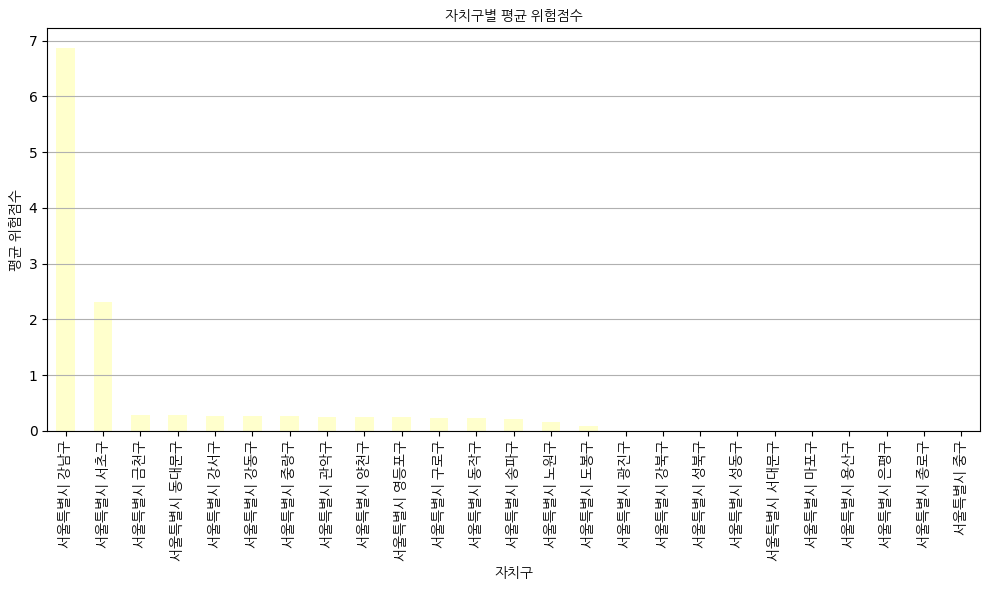

평균 위험점수 상위 10개 자치구:


,위험점수
ADRCD_NM,
서울특별시 강남구,6.875576
서울특별시 서초구,2.316770
서울특별시 금천구,0.288462
서울특별시 동대문구,0.283333
서울특별시 강서구,0.272727
서울특별시 강동구,0.264368
서울특별시 중랑구,0.258065
서울특별시 관악구,0.256410
서울특별시 양천구,0.256281


In [ ]:
# 자치구별 평균 위험점수 계산
district_avg = df.groupby('ADRCD_NM')['위험점수'].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
district_avg.plot(kind='bar', cmap='YlOrRd')
plt.title("자치구별 평균 위험점수", fontproperties = font_prop)
plt.ylabel("평균 위험점수", fontproperties = font_prop)
plt.xlabel("자치구", fontproperties = font_prop)
plt.xticks(fontproperties = font_prop)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 상위 위험 지역 상위 10개 출력
print("평균 위험점수 상위 10개 자치구:")
display(district_avg.head(10))


In [ ]:
# 자치구와 학교급별 학교 수 계산
district_school_level = df.groupby(['ADRCD_NM', '학교급']).size().unstack(fill_value=0)

# 각 자치구별 총 학교 수
district_school_level['총합'] = district_school_level.sum(axis=1)

# 각 학교급 비중 (%) 계산
district_school_level_percent = district_school_level.div(district_school_level['총합'], axis=0) * 100
district_school_level_percent = district_school_level_percent.drop(columns='총합').round(2)

# 상위 위험 지역 학교급 출력
print("자치구별 위험학급")
display(district_school_level_percent.head(10))


자치구별 위험학급


학교급,고등학교,중학교,초등학교
ADRCD_NM,,,
서울특별시 강남구,11.06,31.34,57.60
서울특별시 강동구,9.20,29.89,60.92
서울특별시 강북구,12.50,33.33,54.17
서울특별시 강서구,9.09,29.09,61.82
서울특별시 관악구,12.82,30.77,56.41
서울특별시 광진구,9.92,29.75,60.33
서울특별시 구로구,15.22,28.26,56.52
서울특별시 금천구,7.69,26.92,65.38
서울특별시 노원구,9.23,32.31,58.46


*인사이트 -> 강남구/ 초등학교에 지원이 시급함*

# 정책 제안 방향

1) 학교별 지원 우선순위 도출
등급 하락 또는 정체된 학교 중 환경 개선이 시급한 곳 우선 개입

2) 대표 항목 기반 측정 간소화
상관관계 강한 항목들 통합 → 정책 효율성 + 예산 절감

3) 지역 맞춤형 개입
자치구별 등급 분포 기반으로 예산 및 인력 재배분 필요

4) VOC 계열 통합관리 정책
고위험 VOC 항목은 통합적 규제 및 감시 체계 필요